In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as sch

sns.set_theme(style="darkgrid")
plt.style.use("seaborn")

In [5]:
team= 'Union Berlin'

In [6]:
df_team= pd.read_csv(f'../Data/{team}.csv')
df_team["Date"] = pd.to_datetime(df_team["Date"]) 
df_team.tail()

Team         Opp       Date Result H/A  GF  GA  GD  Poss  PKatt  \
18  Union Berlin   St. Pauli 2025-01-26      L   A   0   3  -3    56      0   
19  Union Berlin  RB Leipzig 2025-02-01      D   H   0   0   0    47      0   
20  Union Berlin  Hoffenheim 2025-02-08      W   A   4   0   4    36      0   
21  Union Berlin    Gladbach 2025-02-15      L   H   1   2  -1    52      1   
22  Union Berlin    Dortmund 2025-02-22      L   A   0   6  -6    36      0   

    ...  xAG   xA  G-xG  np:G-xG  A-xAG  npxG/Sh  FKAtt  PSxG  PSxG/SoT  \
18  ...  1.0  0.8  -1.1     -1.1   -1.0     0.08      1   1.6      0.32   
19  ...  0.8  0.7  -1.3     -1.3   -0.8     0.06      0   0.2      0.08   
20  ...  2.6  1.9   1.2      1.2    0.4     0.13      0   0.5      0.12   
21  ...  1.1  2.0  -1.0     -1.2   -1.1     0.07      0   2.4      0.49   
22  ...  0.2  1.3  -0.3     -0.3   -0.2     0.04      0   5.1      0.63   

    PSxG+/-  
18     -1.4  
19      0.2  
20      0.5  
21      0.4  
22      0.1  

[5 rows x 156 columns]

In [7]:
df_opp= pd.read_csv(f'../Data/vs {team}.csv')
df_opp["Date"] = pd.to_datetime(df_opp["Date"]) 
df_opp.tail()

Team           Opp       Date Result H/A  GF  GA  GD  Poss  PKatt  \
18   St. Pauli  Union Berlin 2025-01-26      W   H   3   0   3    44      0   
19  RB Leipzig  Union Berlin 2025-02-01      D   A   0   0   0    53      0   
20  Hoffenheim  Union Berlin 2025-02-08      L   H   0   4  -4    64      0   
21    Gladbach  Union Berlin 2025-02-15      W   A   2   1   1    48      0   
22    Dortmund  Union Berlin 2025-02-22      W   H   6   0   6    64      0   

    ...  xAG   xA  G-xG  np:G-xG  A-xAG  npxG/Sh  FKAtt  PSxG  PSxG/SoT  \
18  ...  1.0  0.9   1.8      1.8    2.0     0.08      0   0.4      0.22   
19  ...  0.2  0.5  -0.3     -0.3   -0.2     0.05      0   0.5      0.10   
20  ...  0.9  0.7  -1.1     -1.1   -0.9     0.07      1   2.2      0.36   
21  ...  2.0  1.4  -0.1     -0.1    0.0     0.23      0   1.8      0.30   
22  ...  4.3  3.8   0.2      0.2    0.7     0.20      0   0.1      0.13   

    PSxG+/-  
18      0.4  
19      0.5  
20     -1.8  
21      0.8  
22      0.1  

[5 rows x 156 columns]

In [8]:
X= df_team[df_team.columns[3:]]
X.tail()

Result H/A  GF  GA  GD  Poss  PKatt  G-PK  PK  PKm  ...  xAG   xA  G-xG  \
18      L   A   0   3  -3    56      0     0   0    0  ...  1.0  0.8  -1.1   
19      D   H   0   0   0    47      0     0   0    0  ...  0.8  0.7  -1.3   
20      W   A   4   0   4    36      0     4   0    0  ...  2.6  1.9   1.2   
21      L   H   1   2  -1    52      1     0   1    0  ...  1.1  2.0  -1.0   
22      L   A   0   6  -6    36      0     0   0    0  ...  0.2  1.3  -0.3   

    np:G-xG  A-xAG  npxG/Sh  FKAtt  PSxG  PSxG/SoT  PSxG+/-  
18     -1.1   -1.0     0.08      1   1.6      0.32     -1.4  
19     -1.3   -0.8     0.06      0   0.2      0.08      0.2  
20      1.2    0.4     0.13      0   0.5      0.12      0.5  
21     -1.2   -1.1     0.07      0   2.4      0.49      0.4  
22     -0.3   -0.2     0.04      0   5.1      0.63      0.1  

[5 rows x 153 columns]

In [9]:
def Last_n(df, n=5):
    df1= df.copy()
    df1["Result_num"]= df1['Result'].map({'L': 0, 'D': 1, 'W':2})
    plt.figure(figsize=(10, 1))
    sns.heatmap(df1[['Result_num']].iloc[-n:].T, cmap=['red', 'gray', 'green'], cbar=False, xticklabels=df1['Opp'].iloc[-n:])
    plt.xlabel("Game Number")
    plt.yticks([])
    plt.title("Win/Loss Heatmap")

    plt.show()
    #return df1[["Result_num"]].iloc

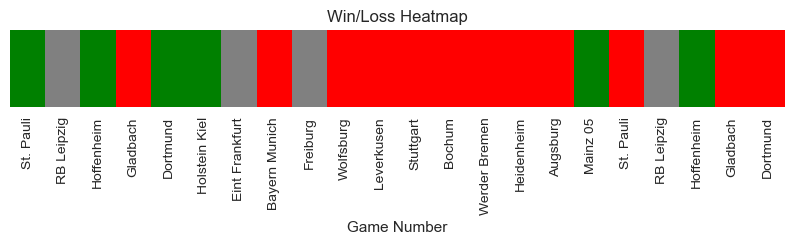

In [11]:
Last_n(df_team, 22)

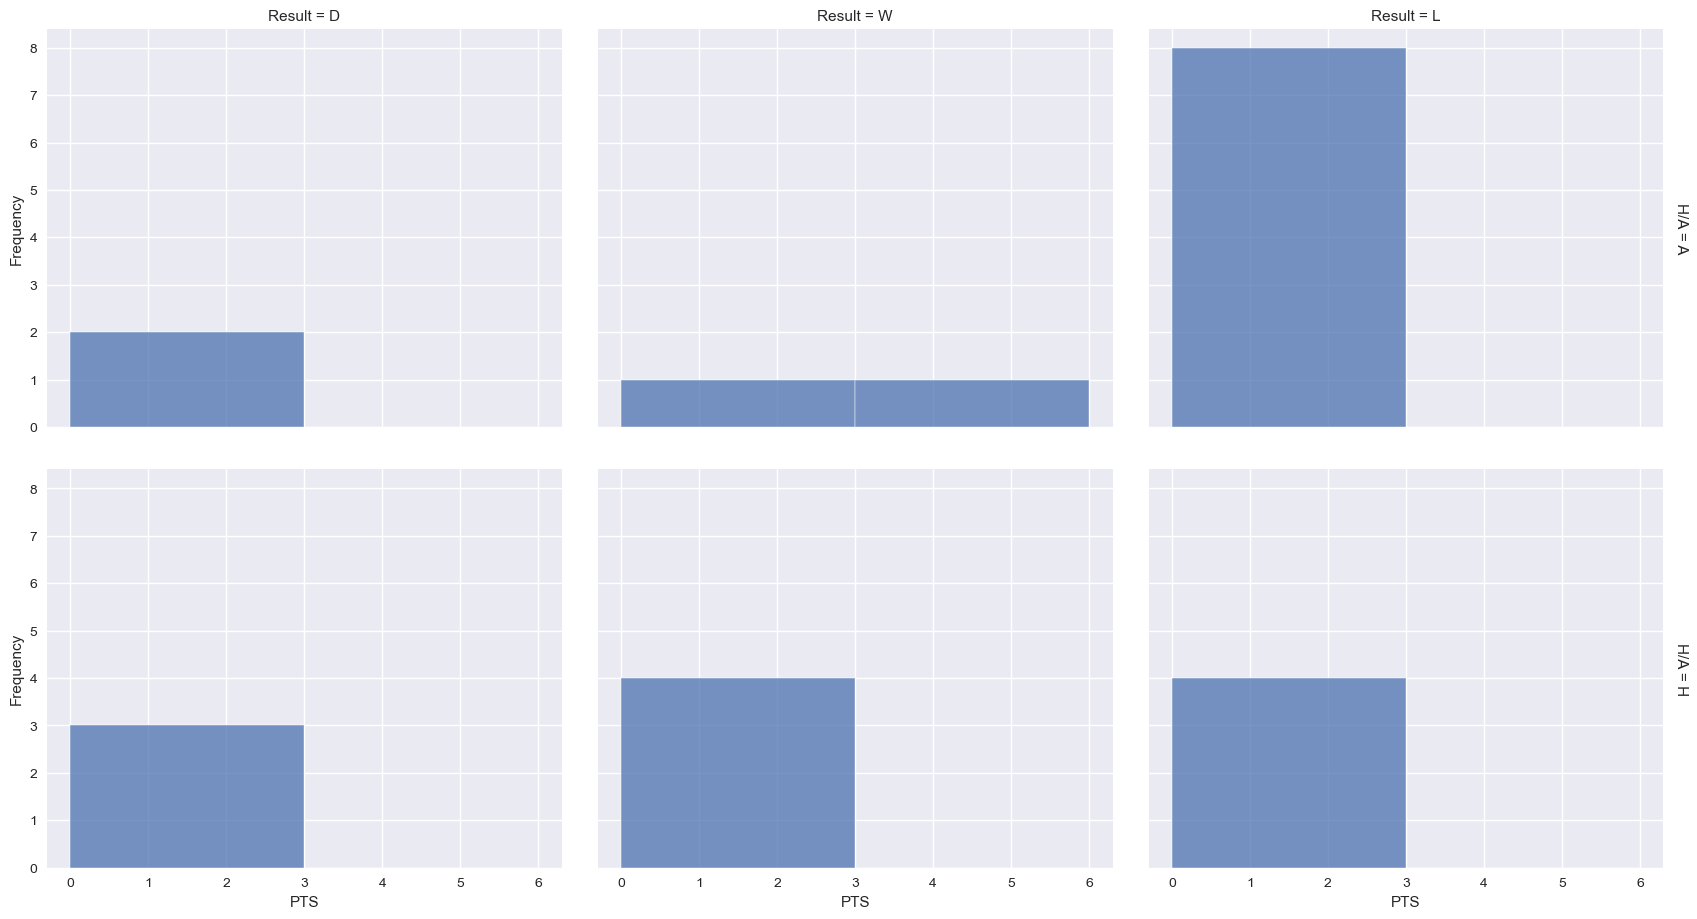

In [12]:
g = sns.displot(
    X, x="GF", col="Result", row="H/A",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

g.fig.set_size_inches(18, 10)
g.set_axis_labels("PTS", "Frequency")

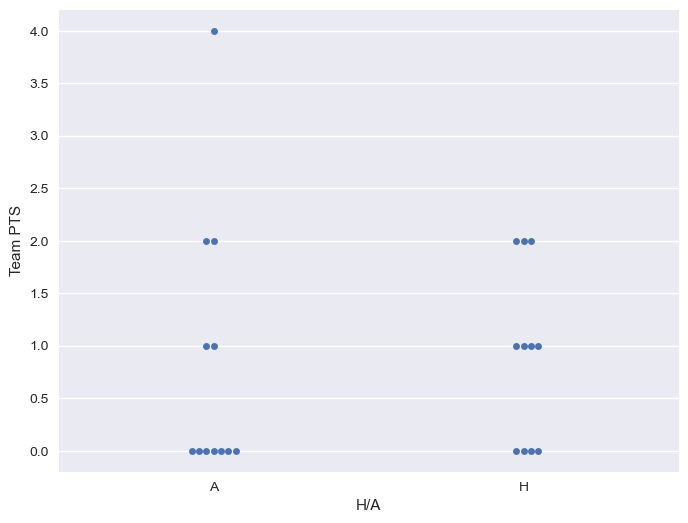

In [14]:
plt.figure(figsize=(8, 6))
#sns.set_style('whitegrid')
sns.swarmplot(x='H/A', y='GF', data=X)
plt.xlabel("H/A")
plt.ylabel("Team PTS")
#plt.title("Total bill per size of the table")
plt.show()

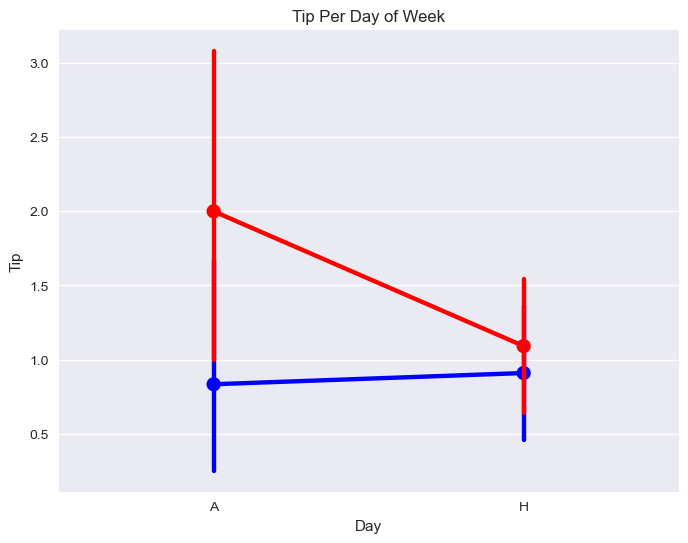

In [15]:
plt.figure(figsize=(8, 6))
sns.pointplot(x="H/A", y="GF", data=X, color='#0000ff')
sns.pointplot(x="H/A", y="GA", data=X, color='#ff0000')
plt.xlabel("Day")
plt.ylabel("Tip")
plt.title("Tip Per Day of Week")
plt.show()

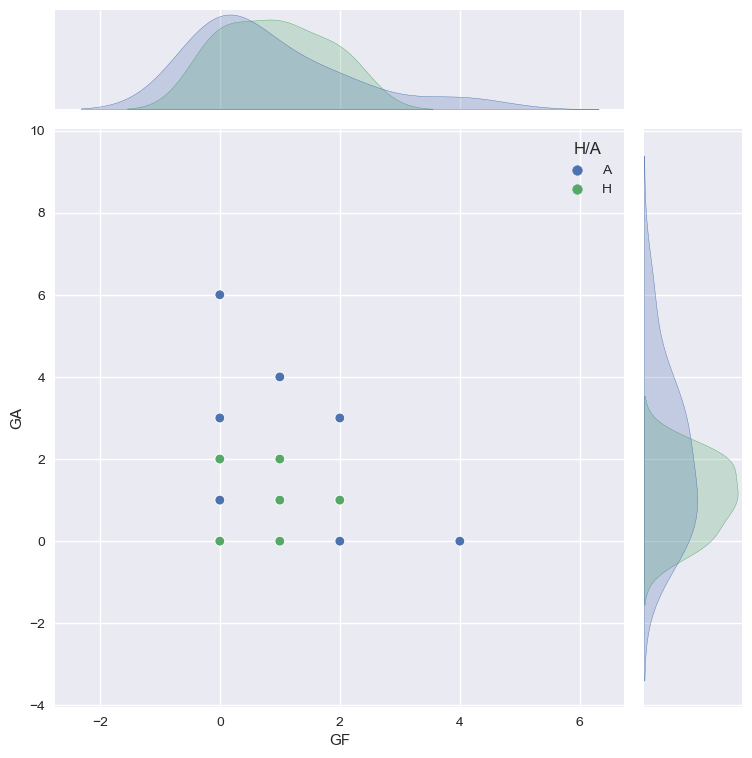

In [16]:
g = sns.jointplot(x='GF', y='GA', hue='H/A', data=X)
g.fig.set_size_inches(8, 8)
g.set_axis_labels("GF", "GA")
plt.show()

Text(0, 0.5, 'PTS')

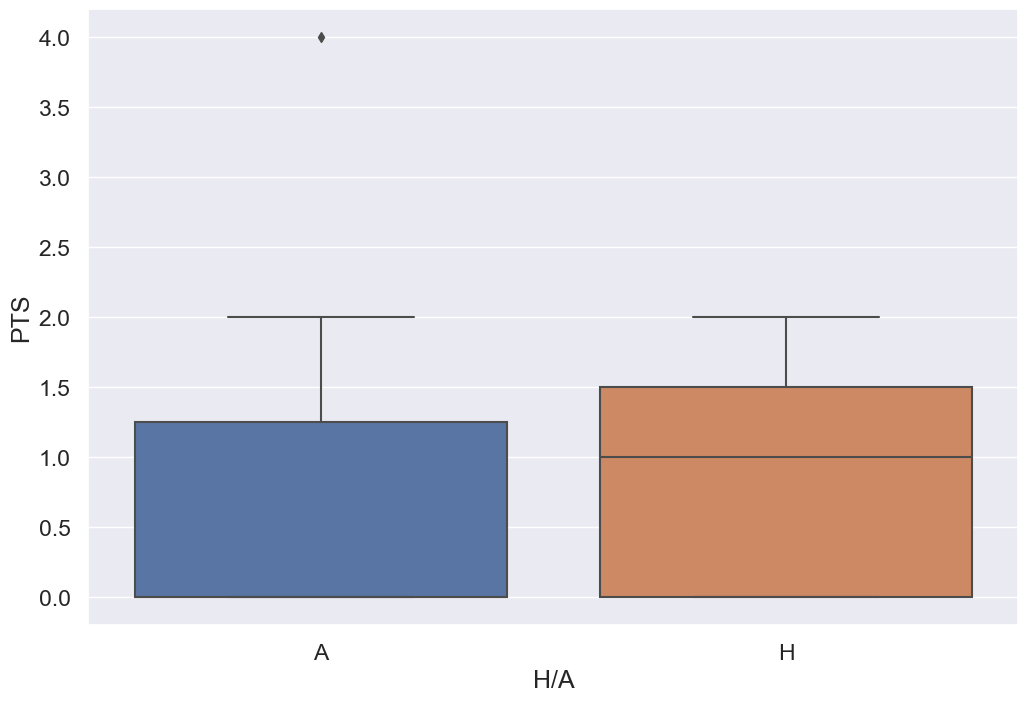

In [17]:
sns.set(font_scale = 1.5)
sns.boxplot(x='H/A', y='GF', data=X)
plt.gcf().set_size_inches(12, 8)
plt.xlabel("H/A")
plt.ylabel("PTS")

Text(0, 0.5, 'Opp_PTS')

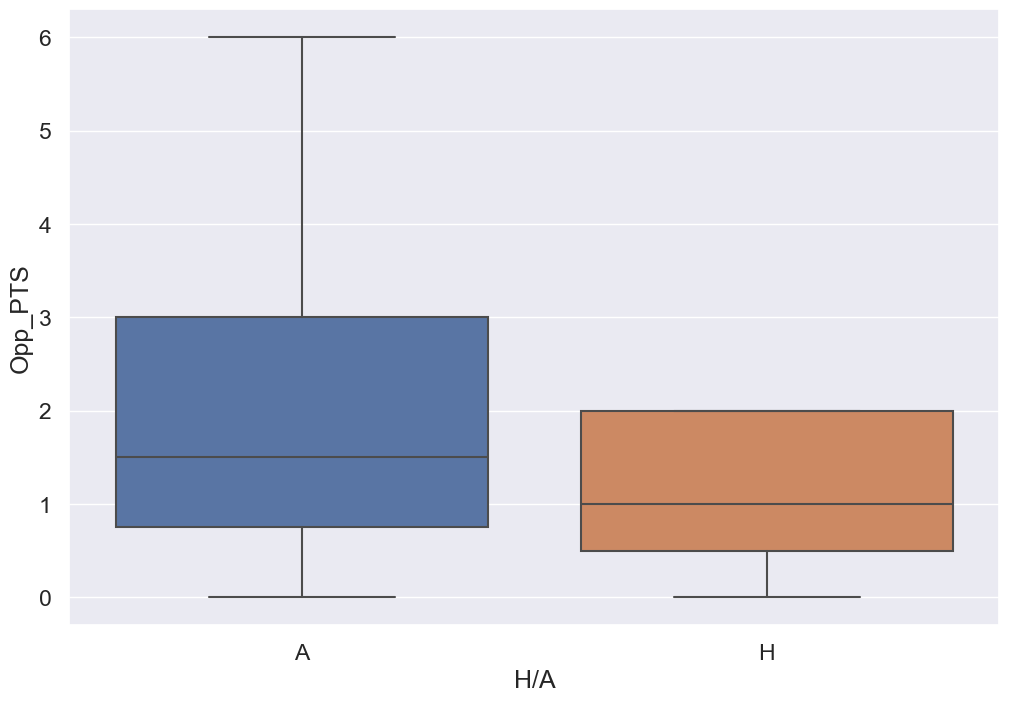

In [18]:
sns.set(font_scale = 1.5)
sns.boxplot(x='H/A', y='GA', data=X)
plt.gcf().set_size_inches(12, 8)
plt.xlabel("H/A")
plt.ylabel("Opp_PTS")

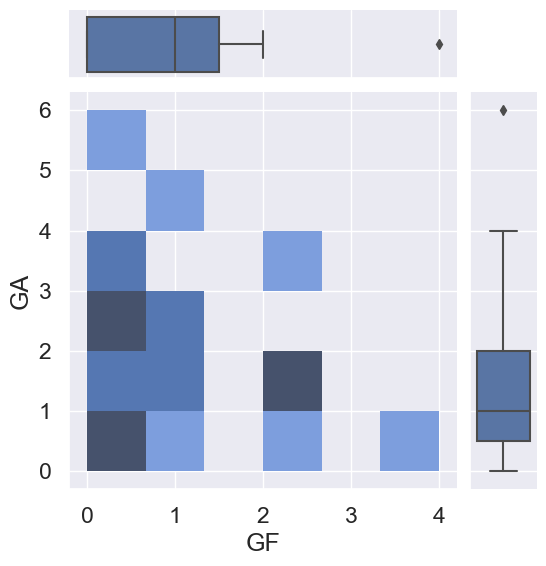

In [19]:
g = sns.JointGrid(data=X, x="GF", y="GA")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

In [13]:
shooting= ['Tm_PTS', 'Tm_FGA', 'Tm_FG%', 'Tm_2PA', 'Tm_2P%', 'Tm_3PA', 'Tm_3P%', 'Tm_FTA', 'Tm_FT%', 'Result']
# 'Tm_ORB', 'Tm_AST', 'Tm_TOV',
#          'Tm_ORtg', 'Tm_FTr', 'Tm_3PAr', 'Tm_TS%', 'Tm_eFG%', 'Tm_FT/FGA', 'Tm_ORB%','Tm_AST%', 'Opp_DRB', 'Opp_STL', 'Opp_BLK', 
 #         'Opp_DRtg', 'Opp_DRB%', 'Opp_STL%', 'Opp_BLK%', 'Opp_TOV%', 'Tm_Pace', 'Result']

In [14]:
X_sh= df_team[shooting]

In [15]:
defence= ['Tm_DRB', 'Tm_STL', 'Tm_BLK', 'Tm_DRtg', 'Tm_DRB%', 'Tm_STL%', 'Tm_BLK%', 'Tm_TOV%', 'Opp_PTS', 'Opp_FGA', 'Opp_FG%', 
          'Opp_2PA', 'Opp_2P%', 'Opp_3PA', 'Opp_3P%', 'Opp_FTA', 'Opp_FT%', 'Opp_ORB', 'Opp_AST', 'Opp_TOV', 'Opp_ORtg', 'Opp_FTr', 
          'Opp_3PAr', 'Opp_TS%', 'Opp_eFG%', 'Opp_FT/FGA', 'Opp_ORB%','Opp_AST%', 'Opp_Pace', 'Result']

In [16]:
X_def= df_team[defence]

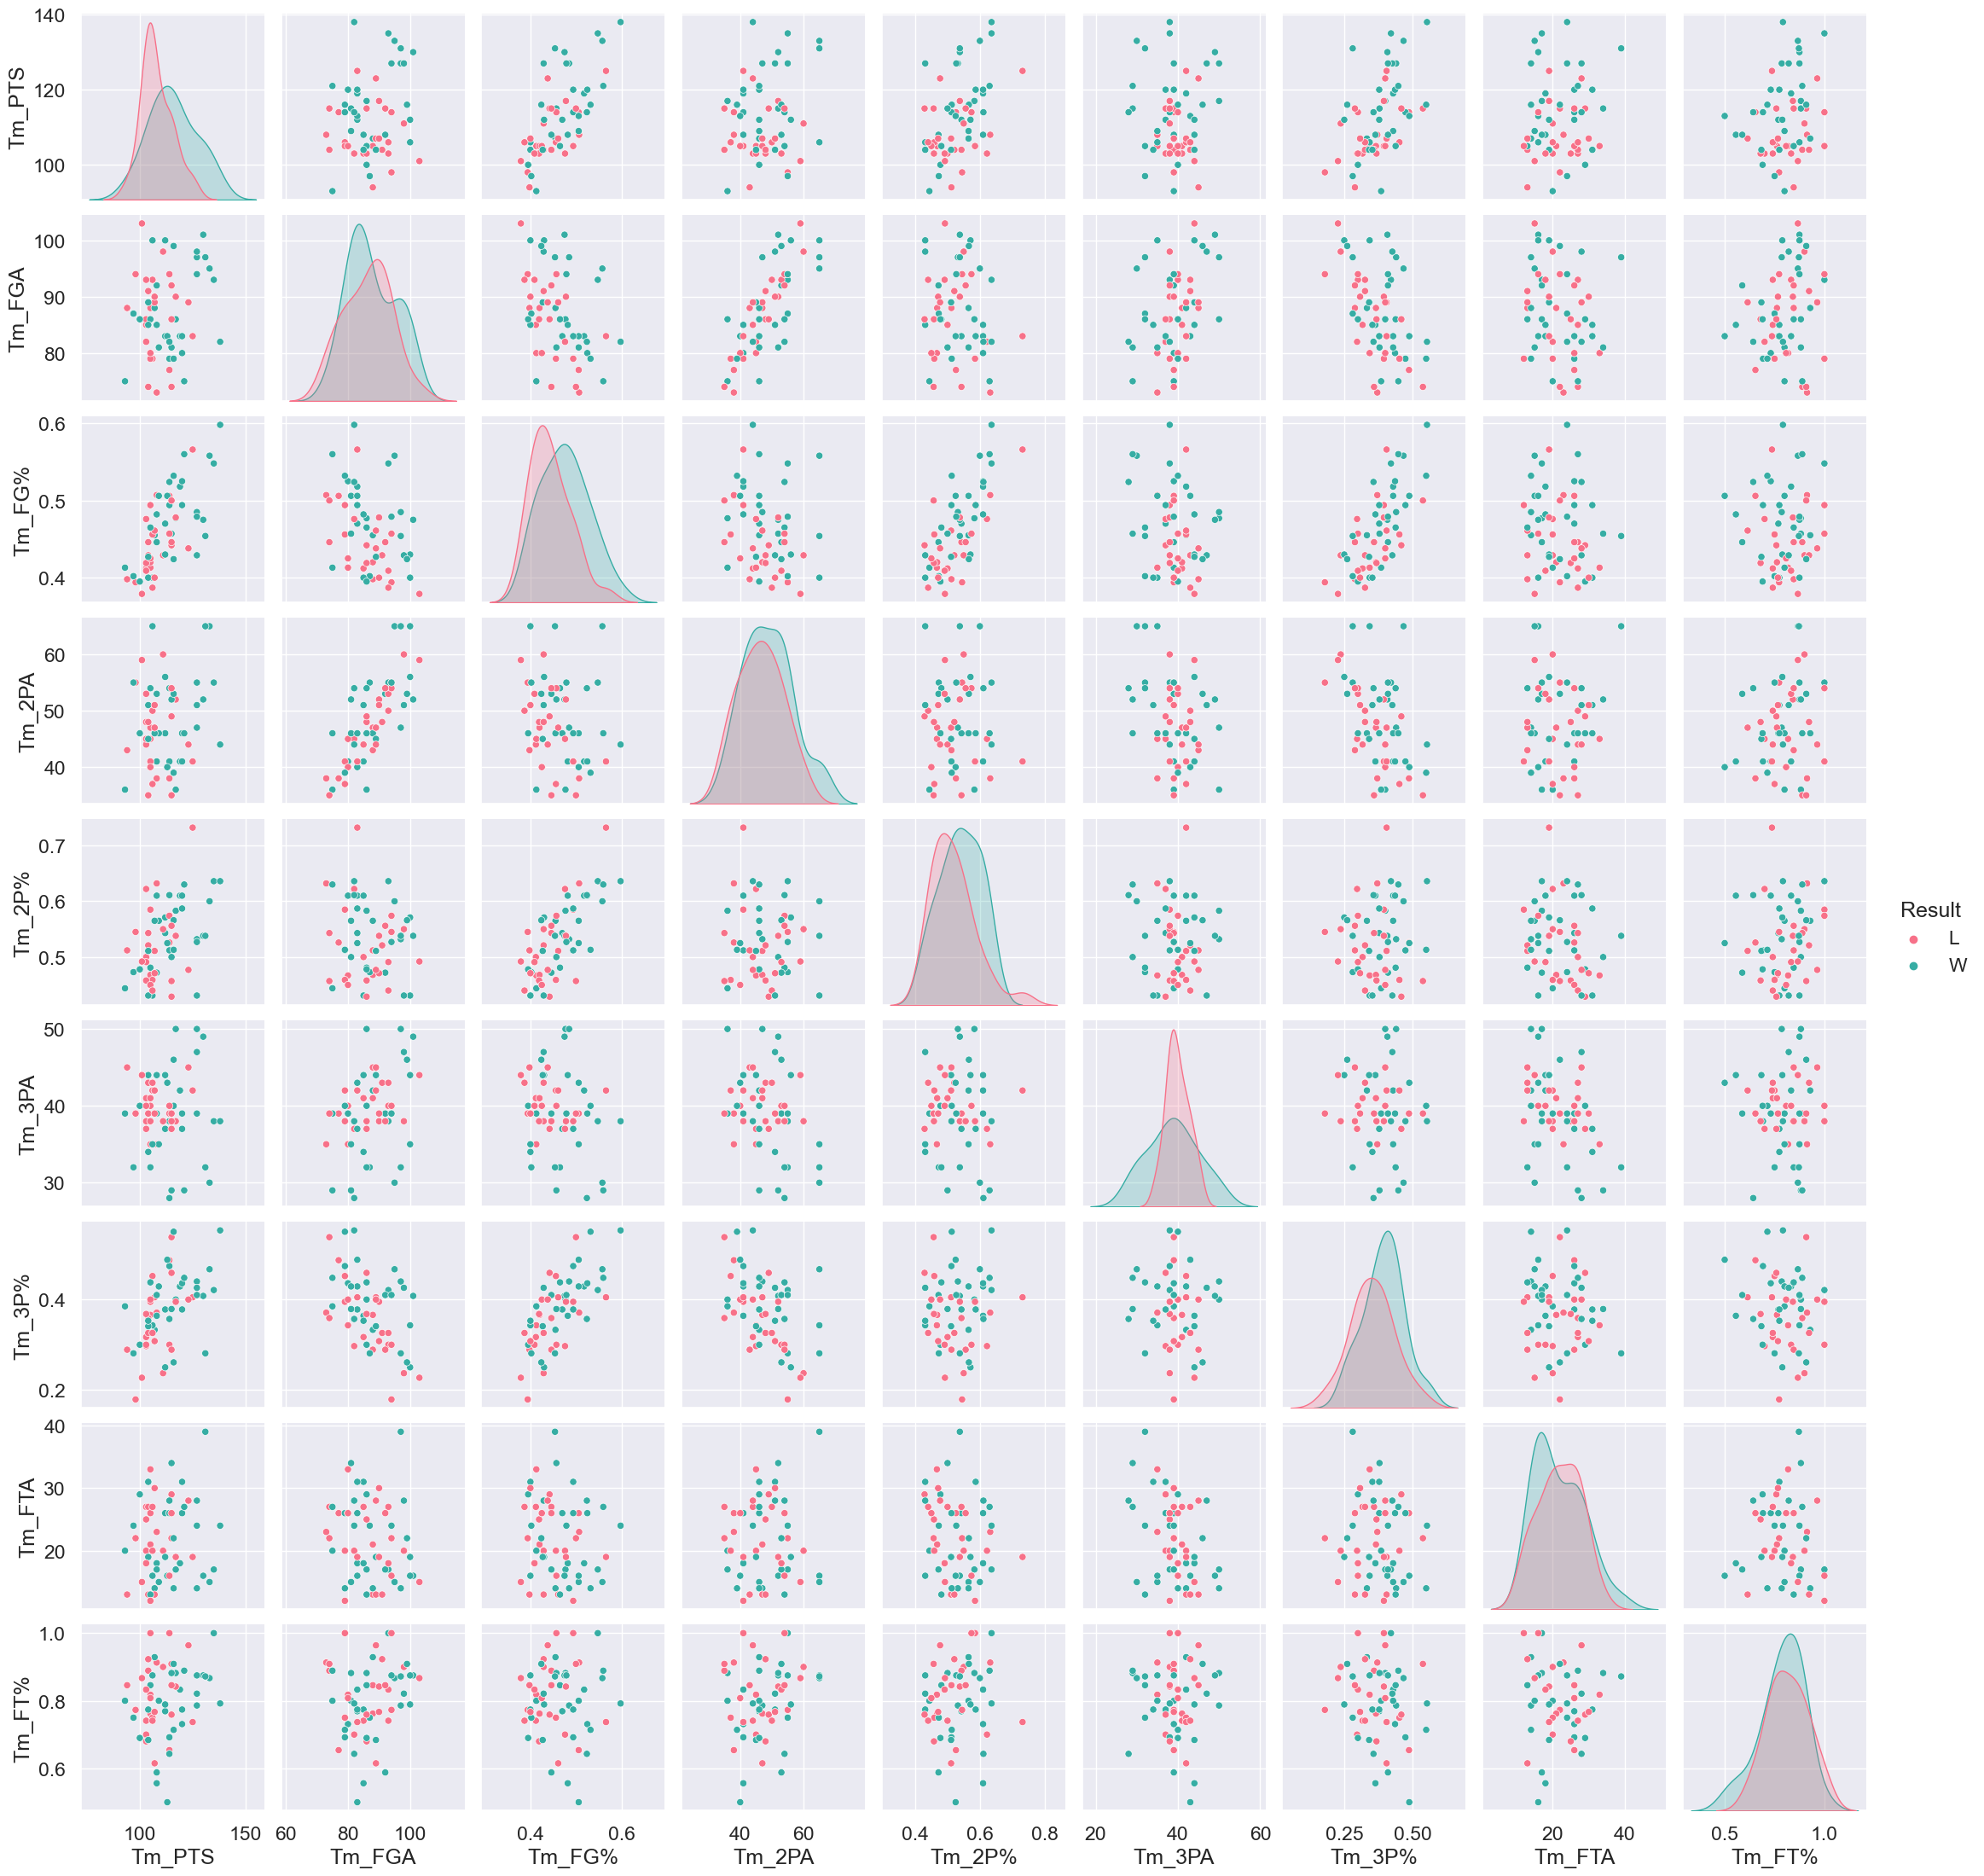

In [17]:
sns.pairplot(X_sh, hue="Result", diag_kind='kde', kind='scatter', palette='husl')
plt.show()

In [18]:
basic= ['Tm_PTS', 'Result', 'Tm_ORB', 'Tm_AST', 'Tm_TOV', 'Opp_STL', 'Opp_BLK']
#          'Tm_ORtg', 'Tm_FTr', 'Tm_3PAr', 'Tm_TS%', 'Tm_eFG%', 'Tm_FT/FGA', 'Tm_ORB%','Tm_AST%', 'Opp_DRB',  
 #         'Opp_DRtg', 'Opp_DRB%', 'Opp_STL%', 'Opp_BLK%', 'Opp_TOV%', 'Tm_Pace', 'Result']

In [19]:
X_bas= df_team[basic]


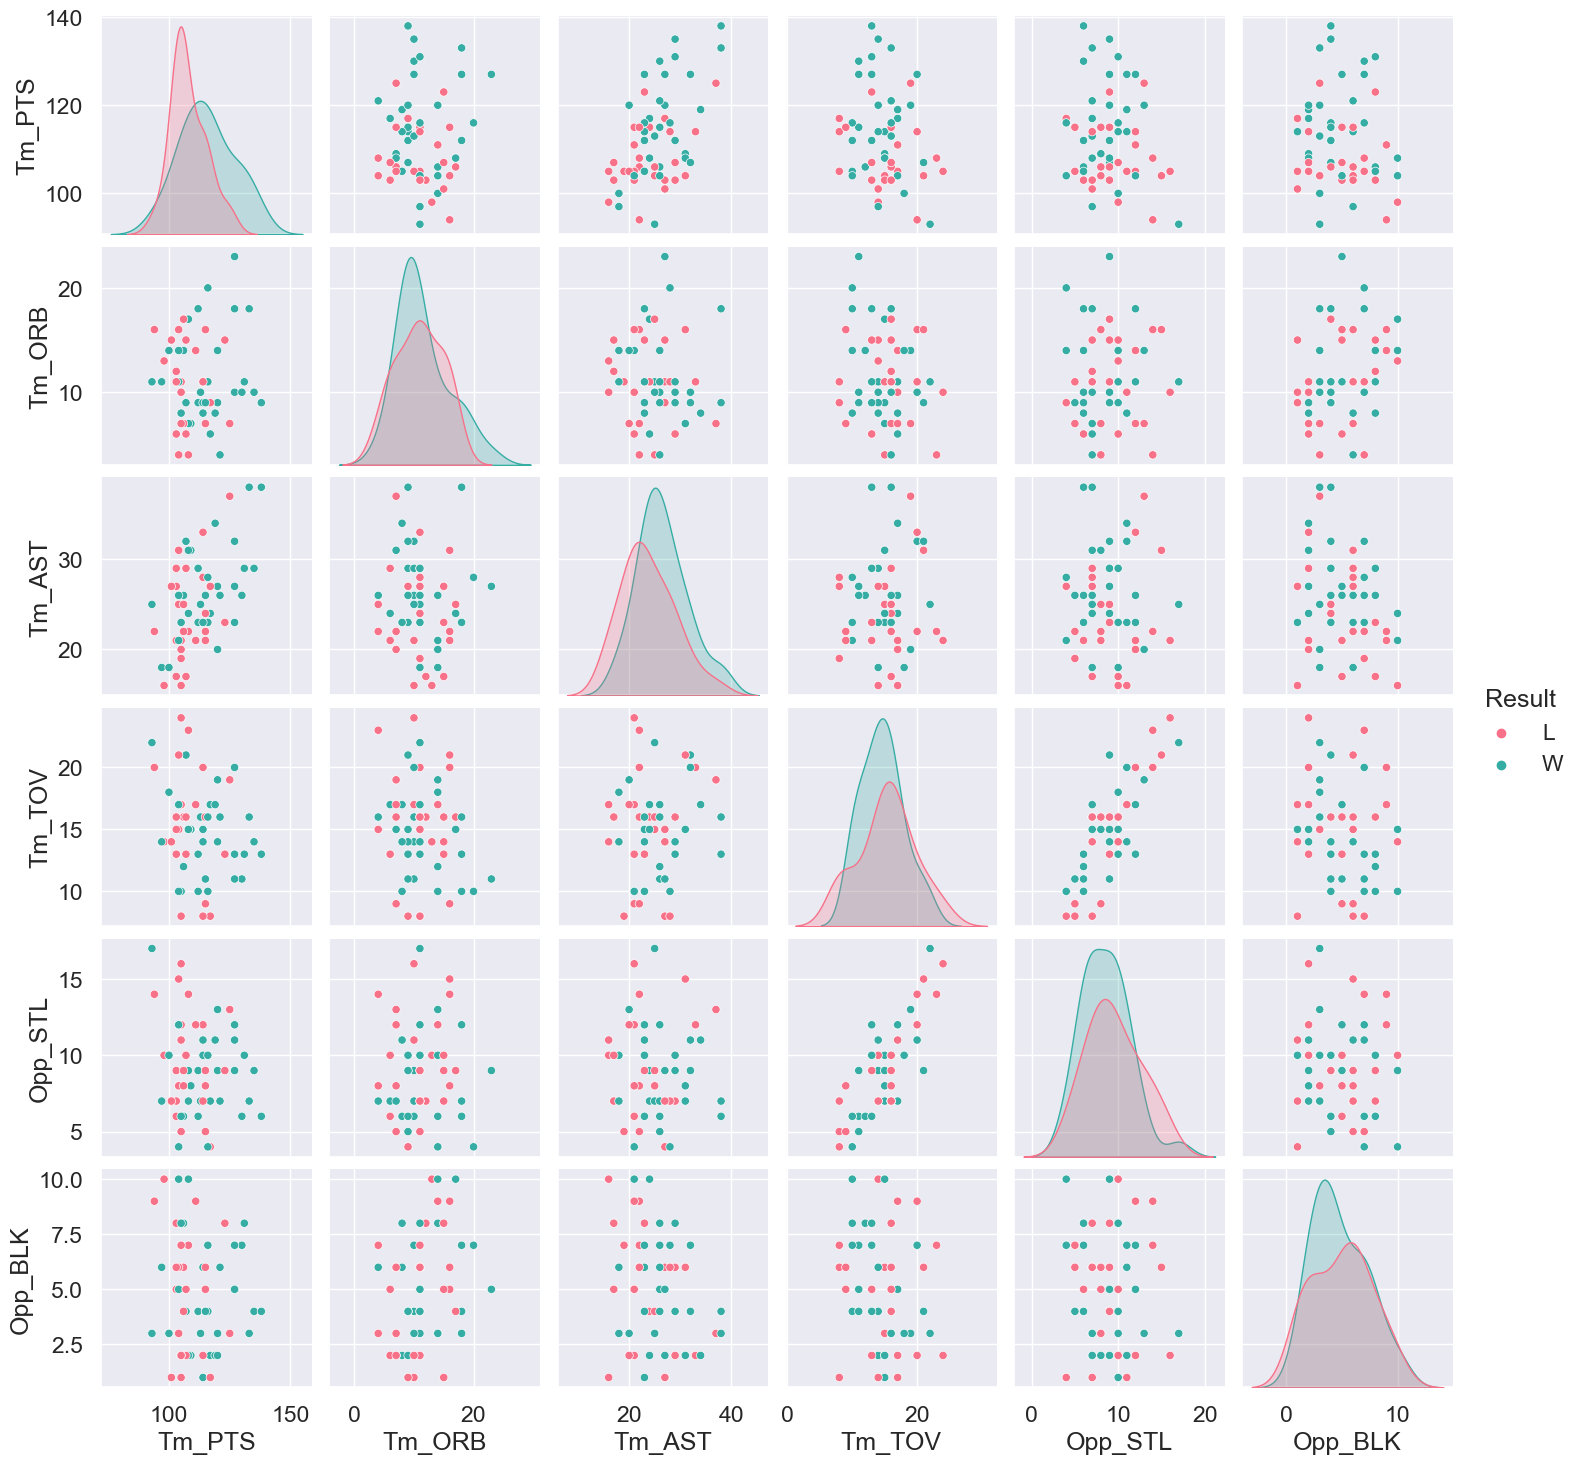

In [20]:
sns.pairplot(X_bas, hue="Result", diag_kind='kde', kind='scatter', palette='husl')
plt.show()

In [21]:
adv_sh= ['Tm_PTS', 'Result', 'Tm_ORtg', 'Tm_FTr', 'Tm_3PAr', 'Tm_TS%', 'Tm_eFG%', 'Tm_FT/FGA', 'Tm_Pace']#, 'Tm_ORB%','Tm_AST%', 'Opp_DRB',           
#         'Opp_DRtg', 'Opp_DRB%', 'Opp_STL%', 'Opp_BLK%', 'Opp_TOV%', 


In [22]:
X_adv_sh= df_team[adv_sh]


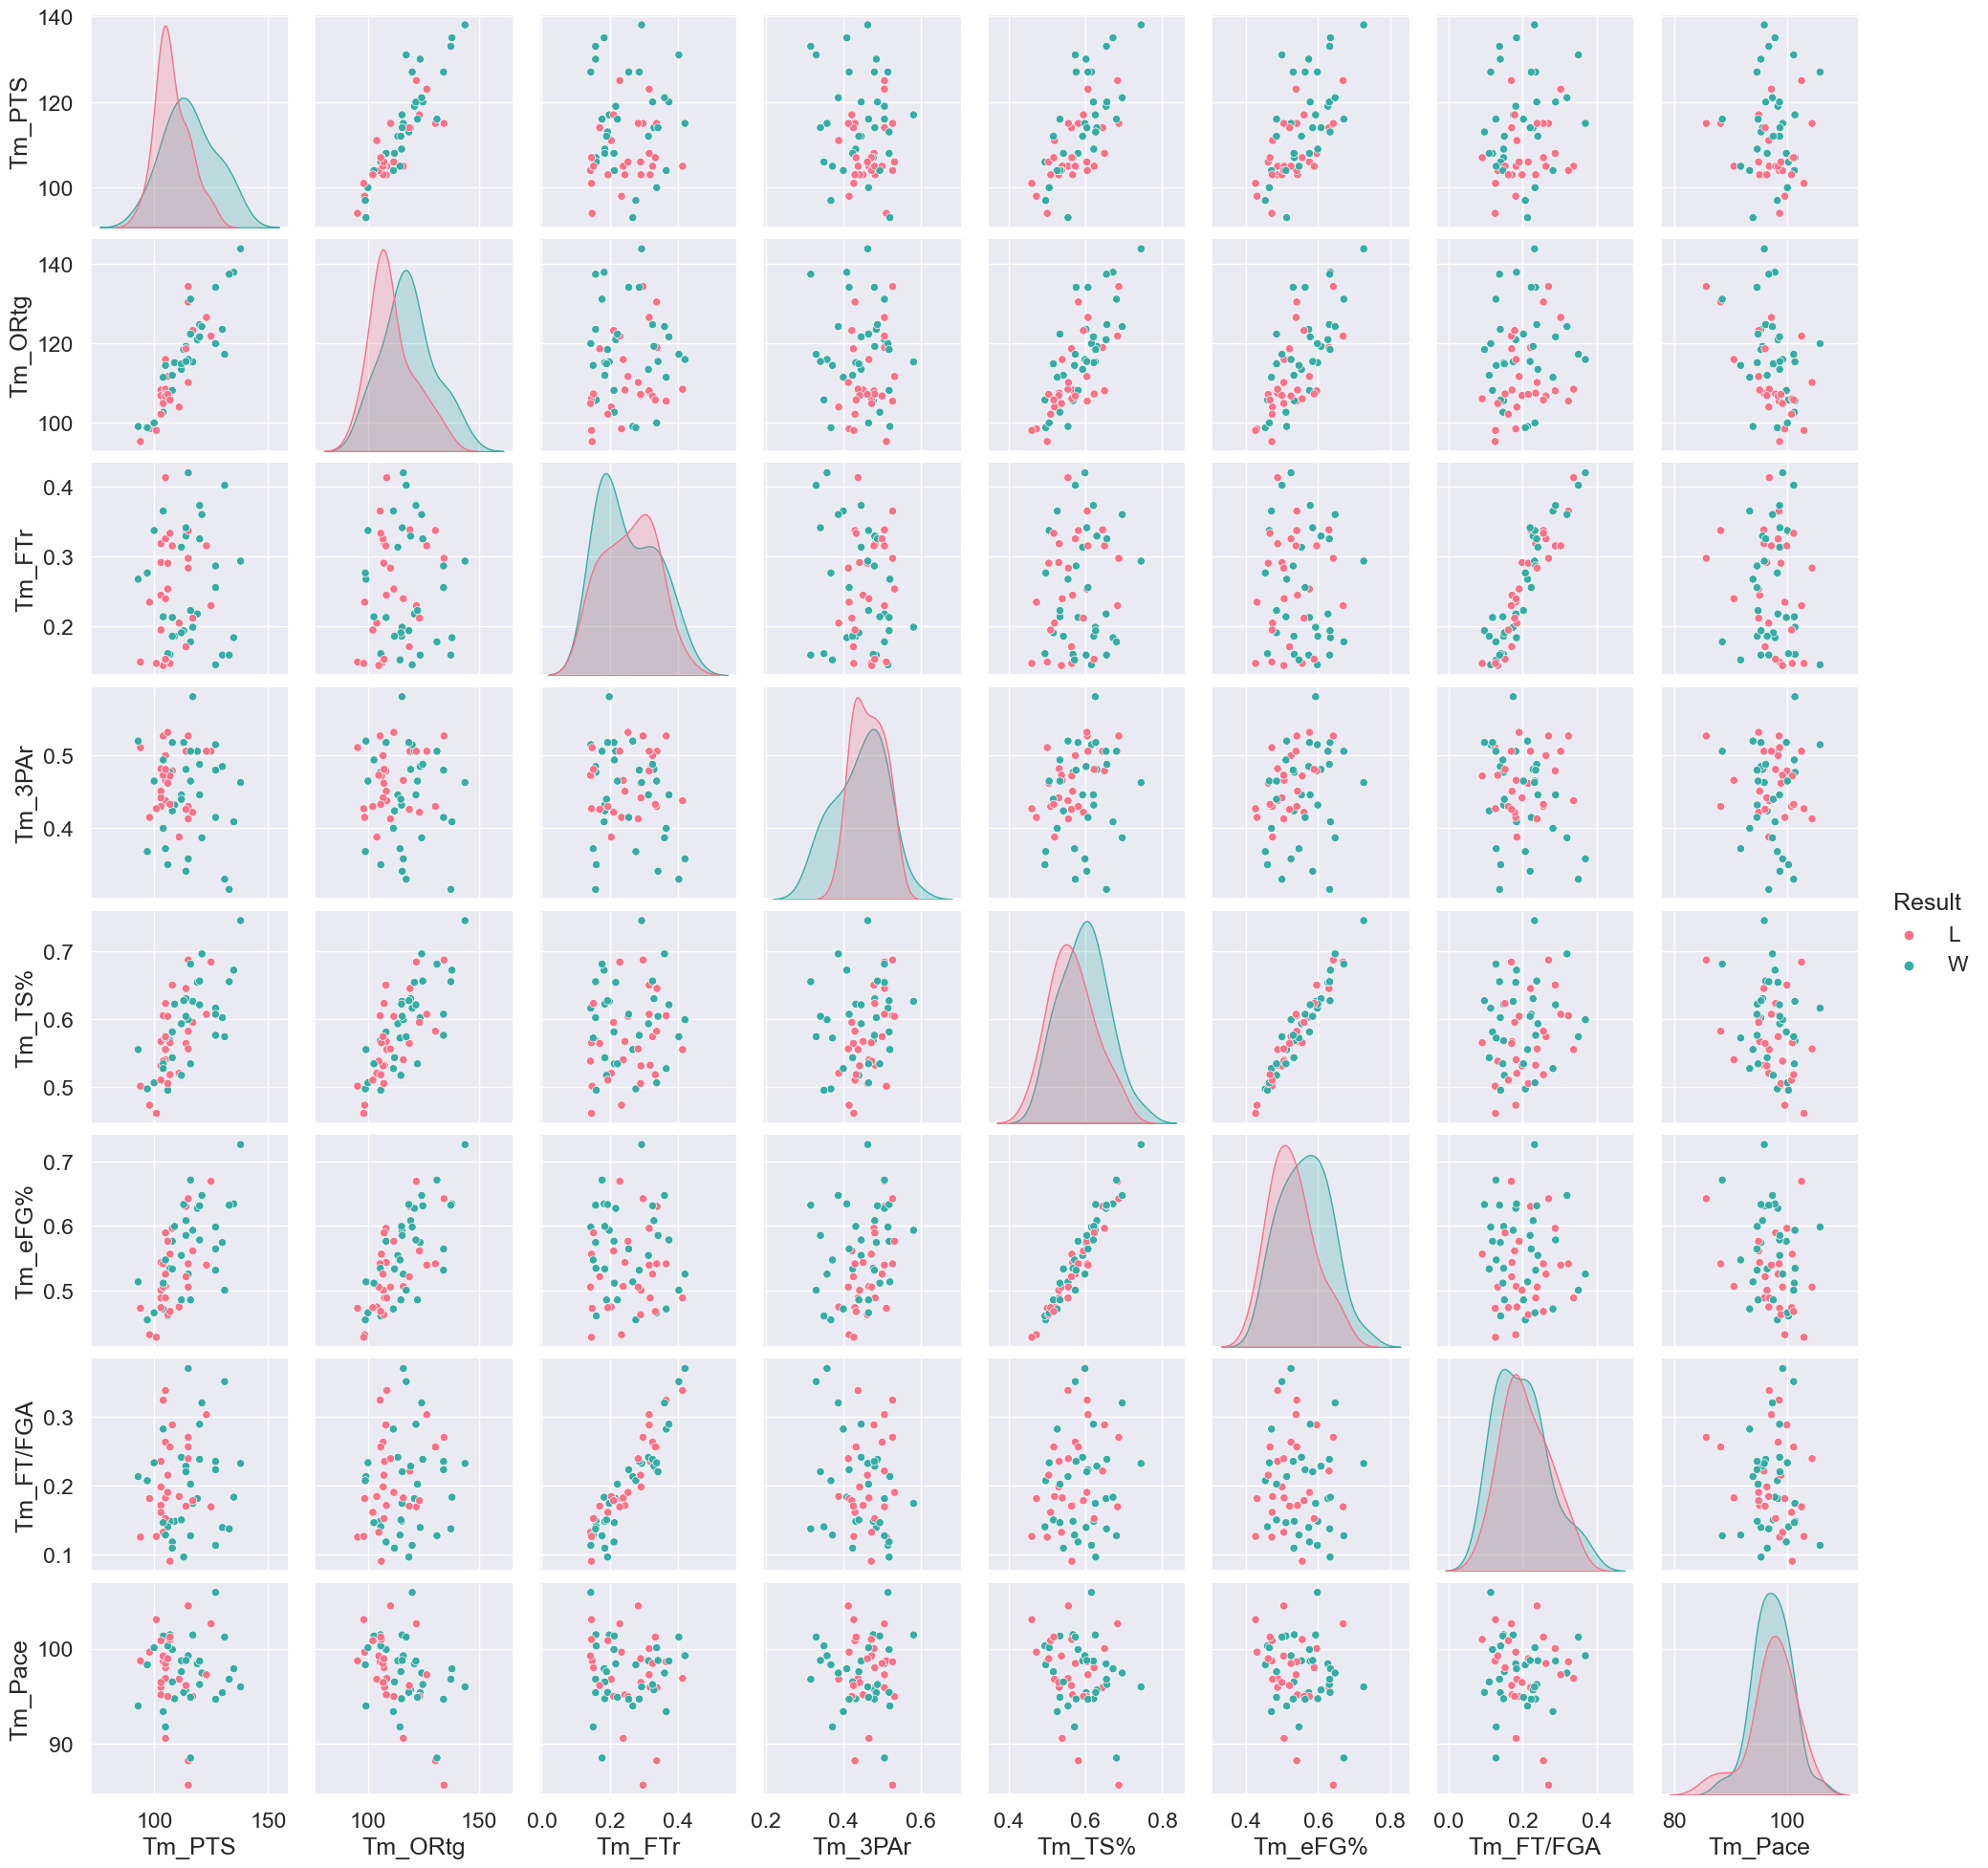

In [23]:
sns.pairplot(X_adv_sh, hue="Result", diag_kind='kde', kind='scatter', palette='husl')
plt.show()

In [24]:
adv_off= ['Tm_PTS', 'Result', 'Tm_ORB%','Tm_AST%', 'Opp_DRB', 'Opp_DRtg', 'Opp_DRB%', 'Opp_STL%', 'Opp_BLK%', 'Opp_TOV%']


In [25]:
X_adv_off= df_team[adv_off]


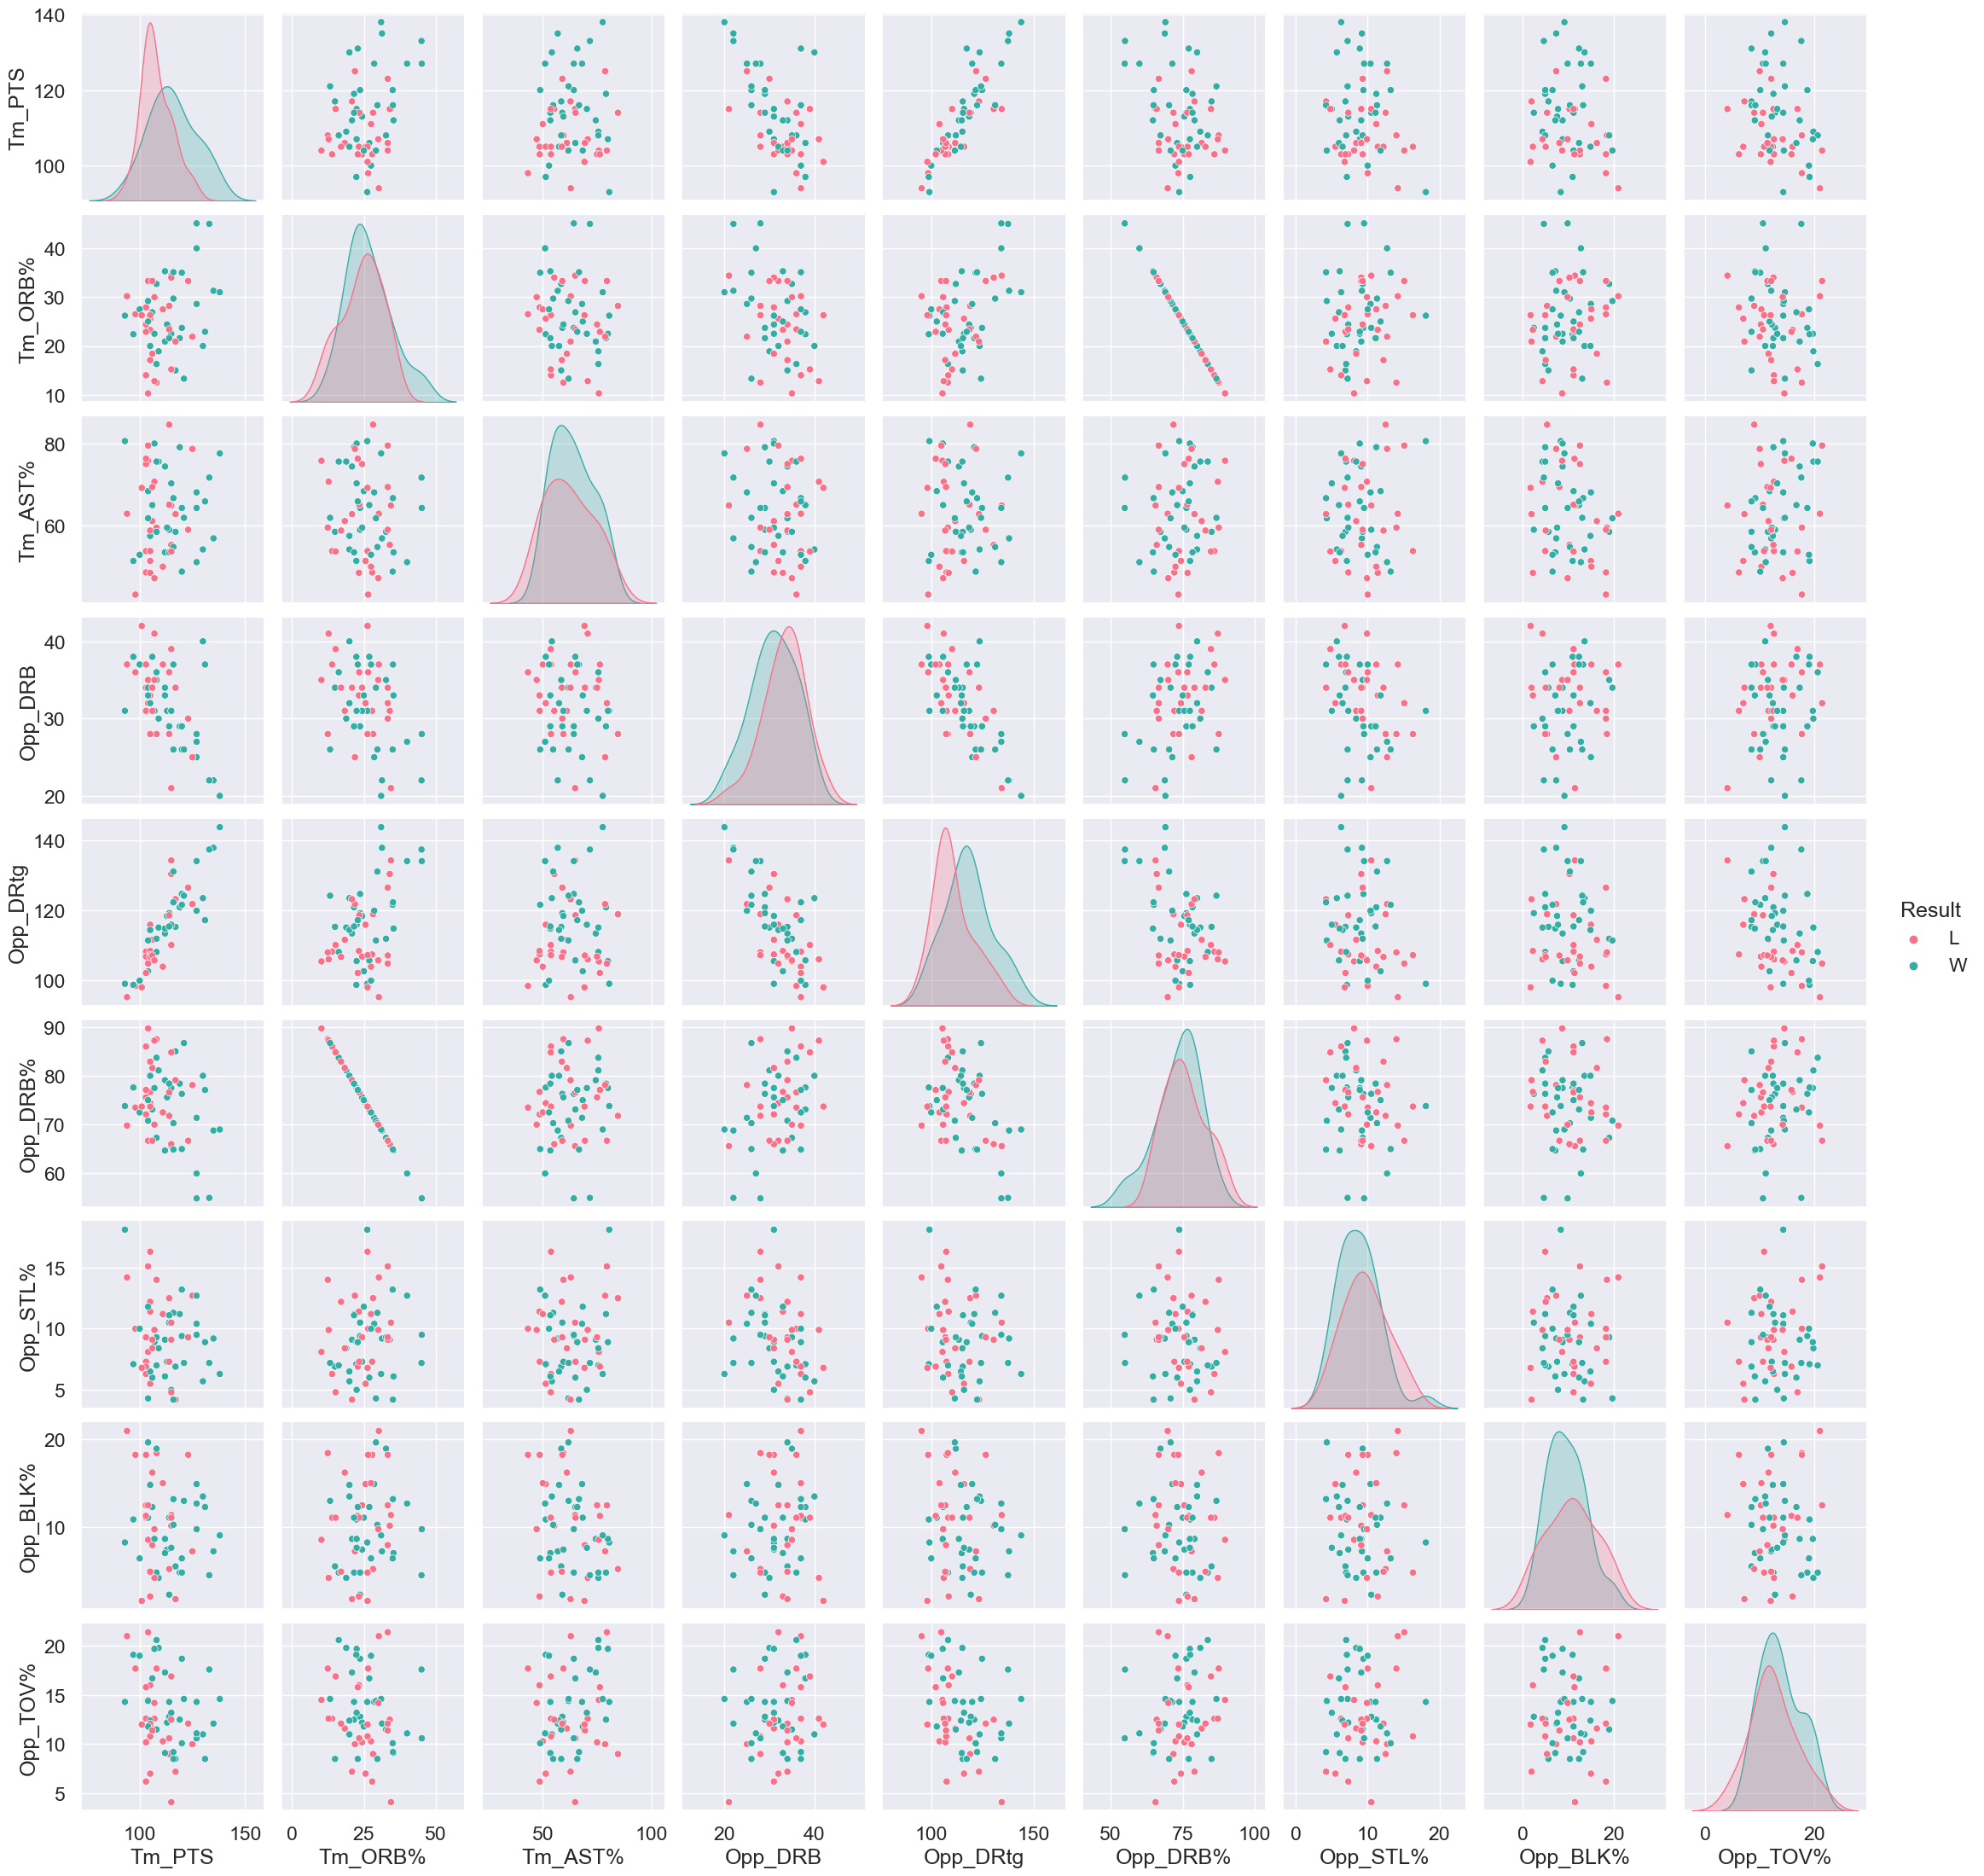

In [26]:
sns.pairplot(X_adv_off, hue="Result", diag_kind='kde', kind='scatter', palette='husl')
plt.show()

In [27]:
Opp_shooting= ['Opp_PTS', 'Opp_FGA', 'Opp_FG%', 'Opp_2PA', 'Opp_2P%', 'Opp_3PA', 'Opp_3P%', 'Opp_FTA', 'Opp_FT%', 'Result']
# 'Tm_ORB', 'Tm_AST', 'Tm_TOV',
#          'Tm_ORtg', 'Tm_FTr', 'Tm_3PAr', 'Tm_TS%', 'Tm_eFG%', 'Tm_FT/FGA', 'Tm_ORB%','Tm_AST%', 'Opp_DRB', 'Opp_STL', 'Opp_BLK', 
 #         'Opp_DRtg', 'Opp_DRB%', 'Opp_STL%', 'Opp_BLK%', 'Opp_TOV%', 'Tm_Pace', 'Result']

In [28]:
X_Opp_sh= df_team[Opp_shooting]

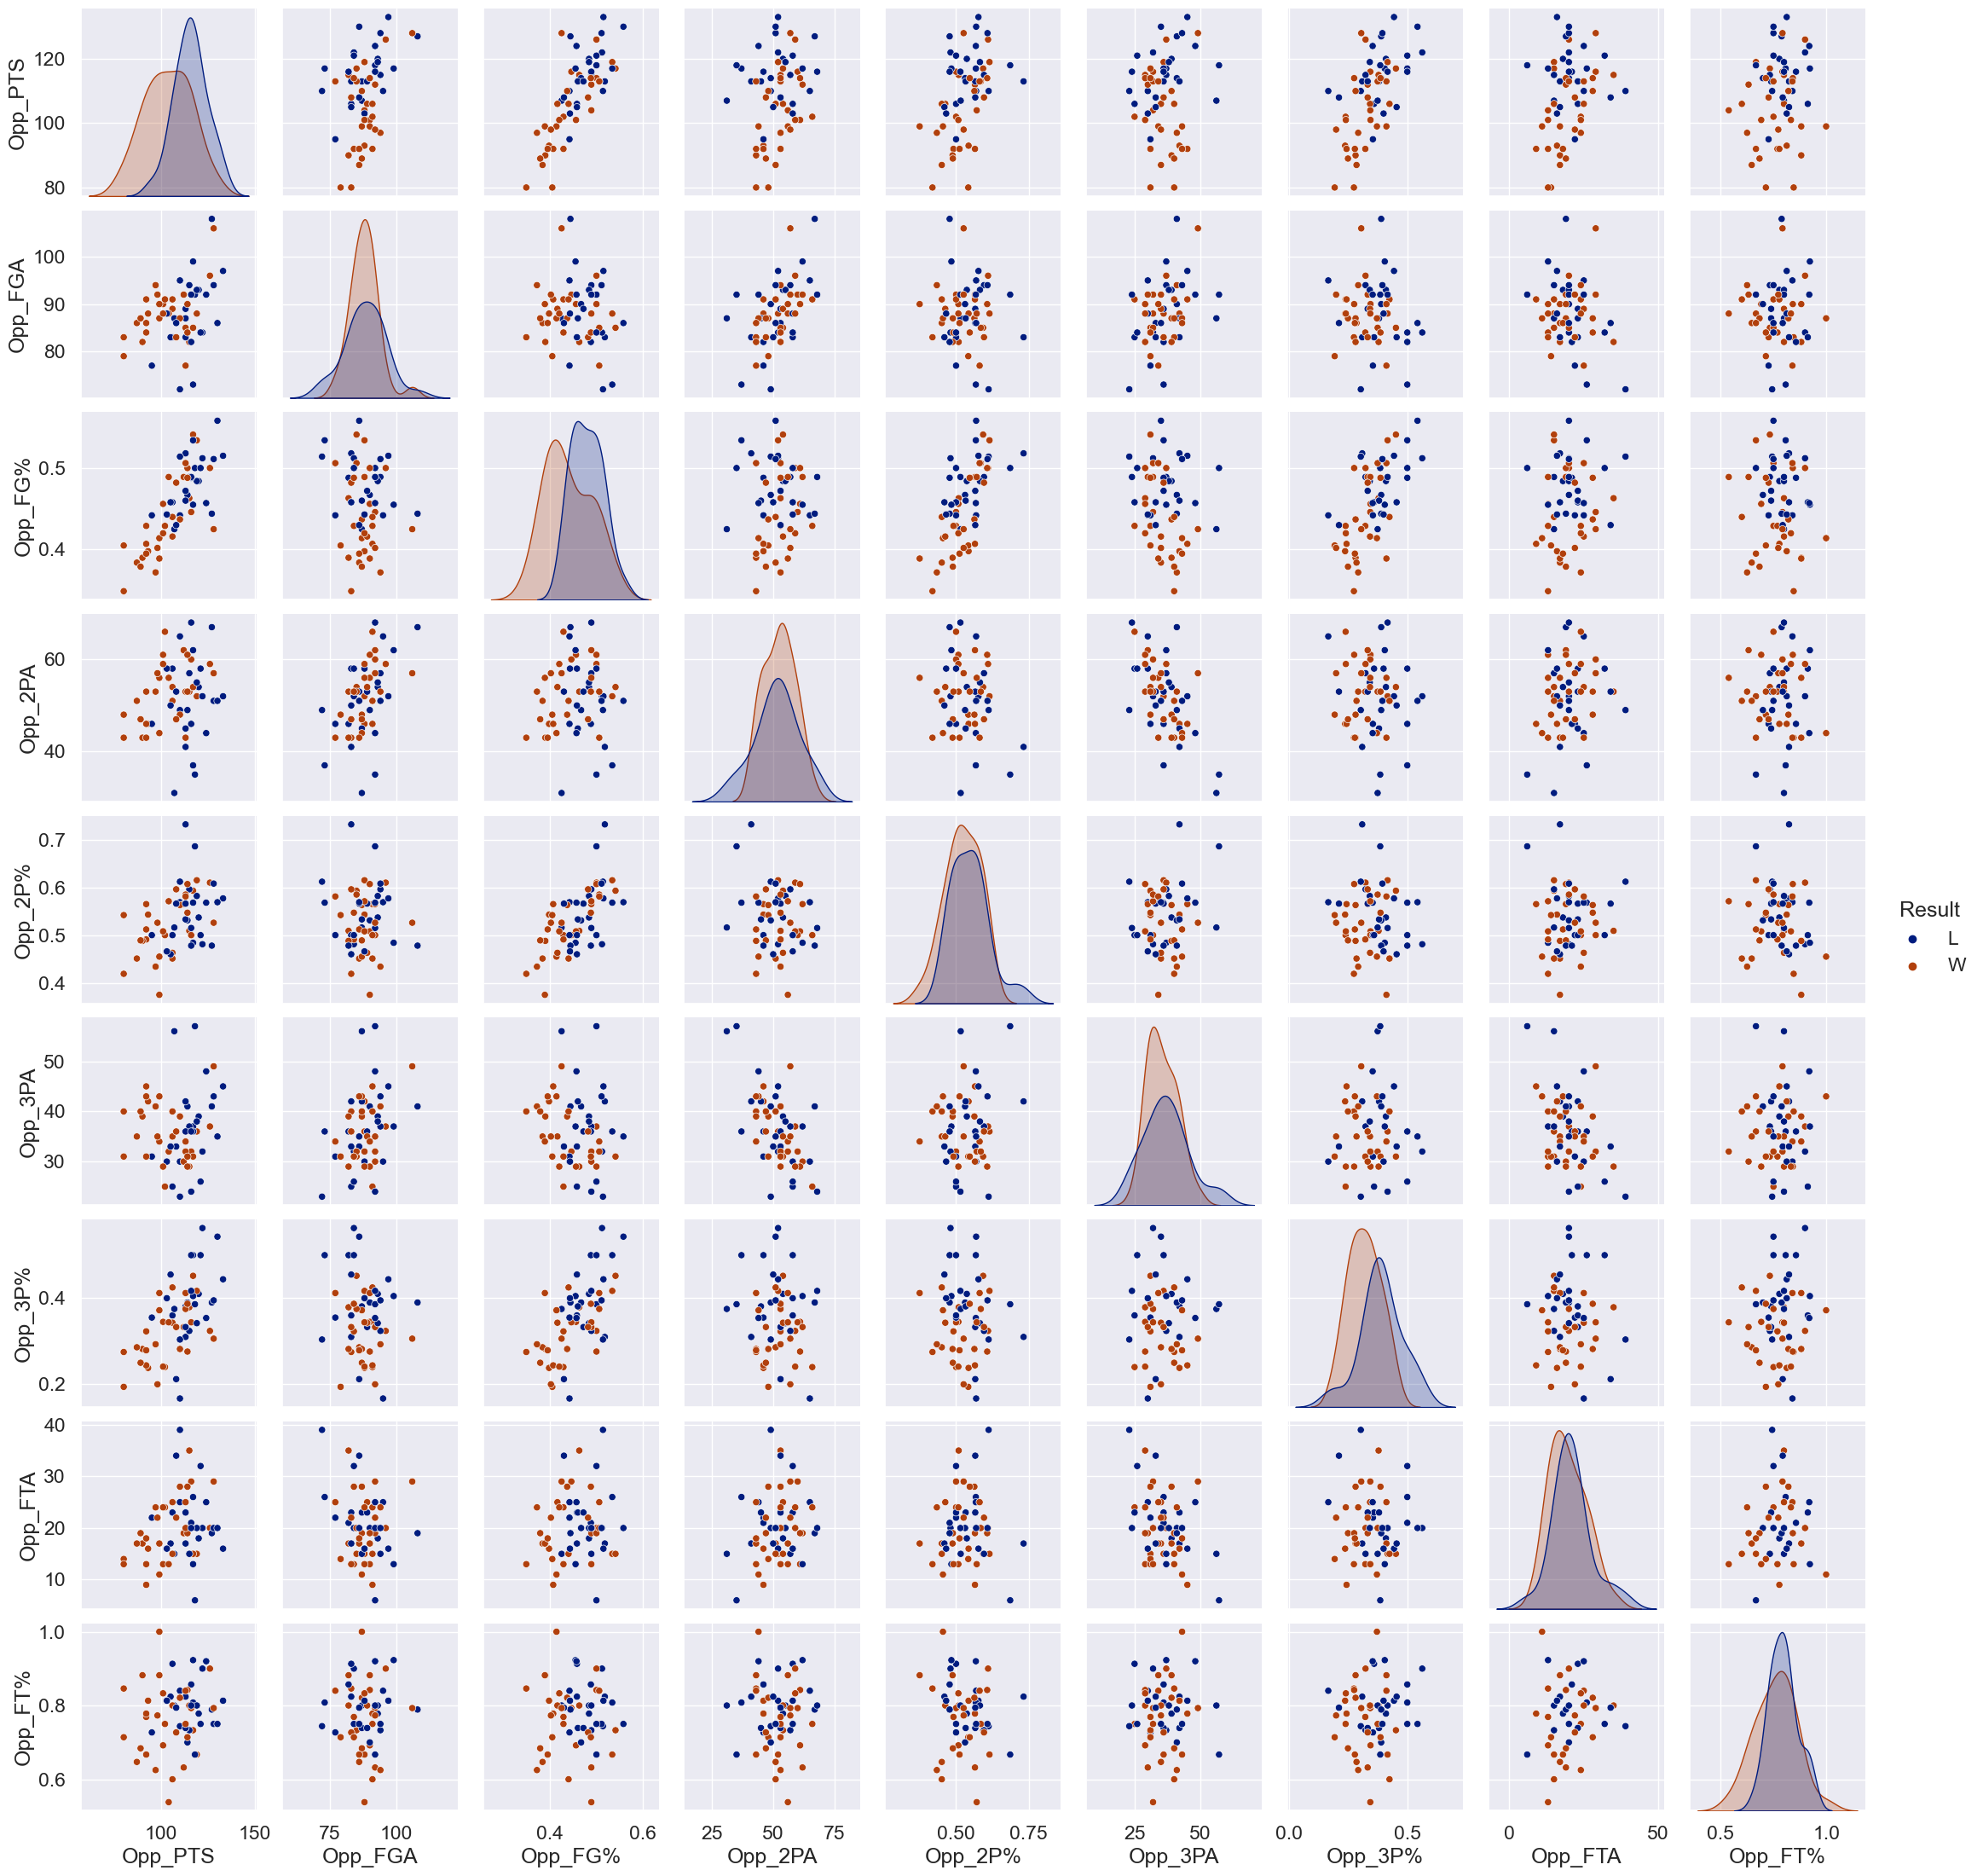

In [29]:
sns.pairplot(X_Opp_sh, hue="Result", diag_kind='kde', kind='scatter', palette='dark')
plt.show()

In [30]:
Opp_basic= ['Opp_PTS', 'Result', 'Opp_ORB', 'Opp_AST', 'Opp_TOV', 'Tm_STL', 'Tm_BLK']
#          'Tm_ORtg', 'Tm_FTr', 'Tm_3PAr', 'Tm_TS%', 'Tm_eFG%', 'Tm_FT/FGA', 'Tm_ORB%','Tm_AST%', 'Opp_DRB',  
 #         'Opp_DRtg', 'Opp_DRB%', 'Opp_STL%', 'Opp_BLK%', 'Opp_TOV%', 'Tm_Pace', 'Result']

In [31]:
X_Opp_bas= df_team[Opp_basic]


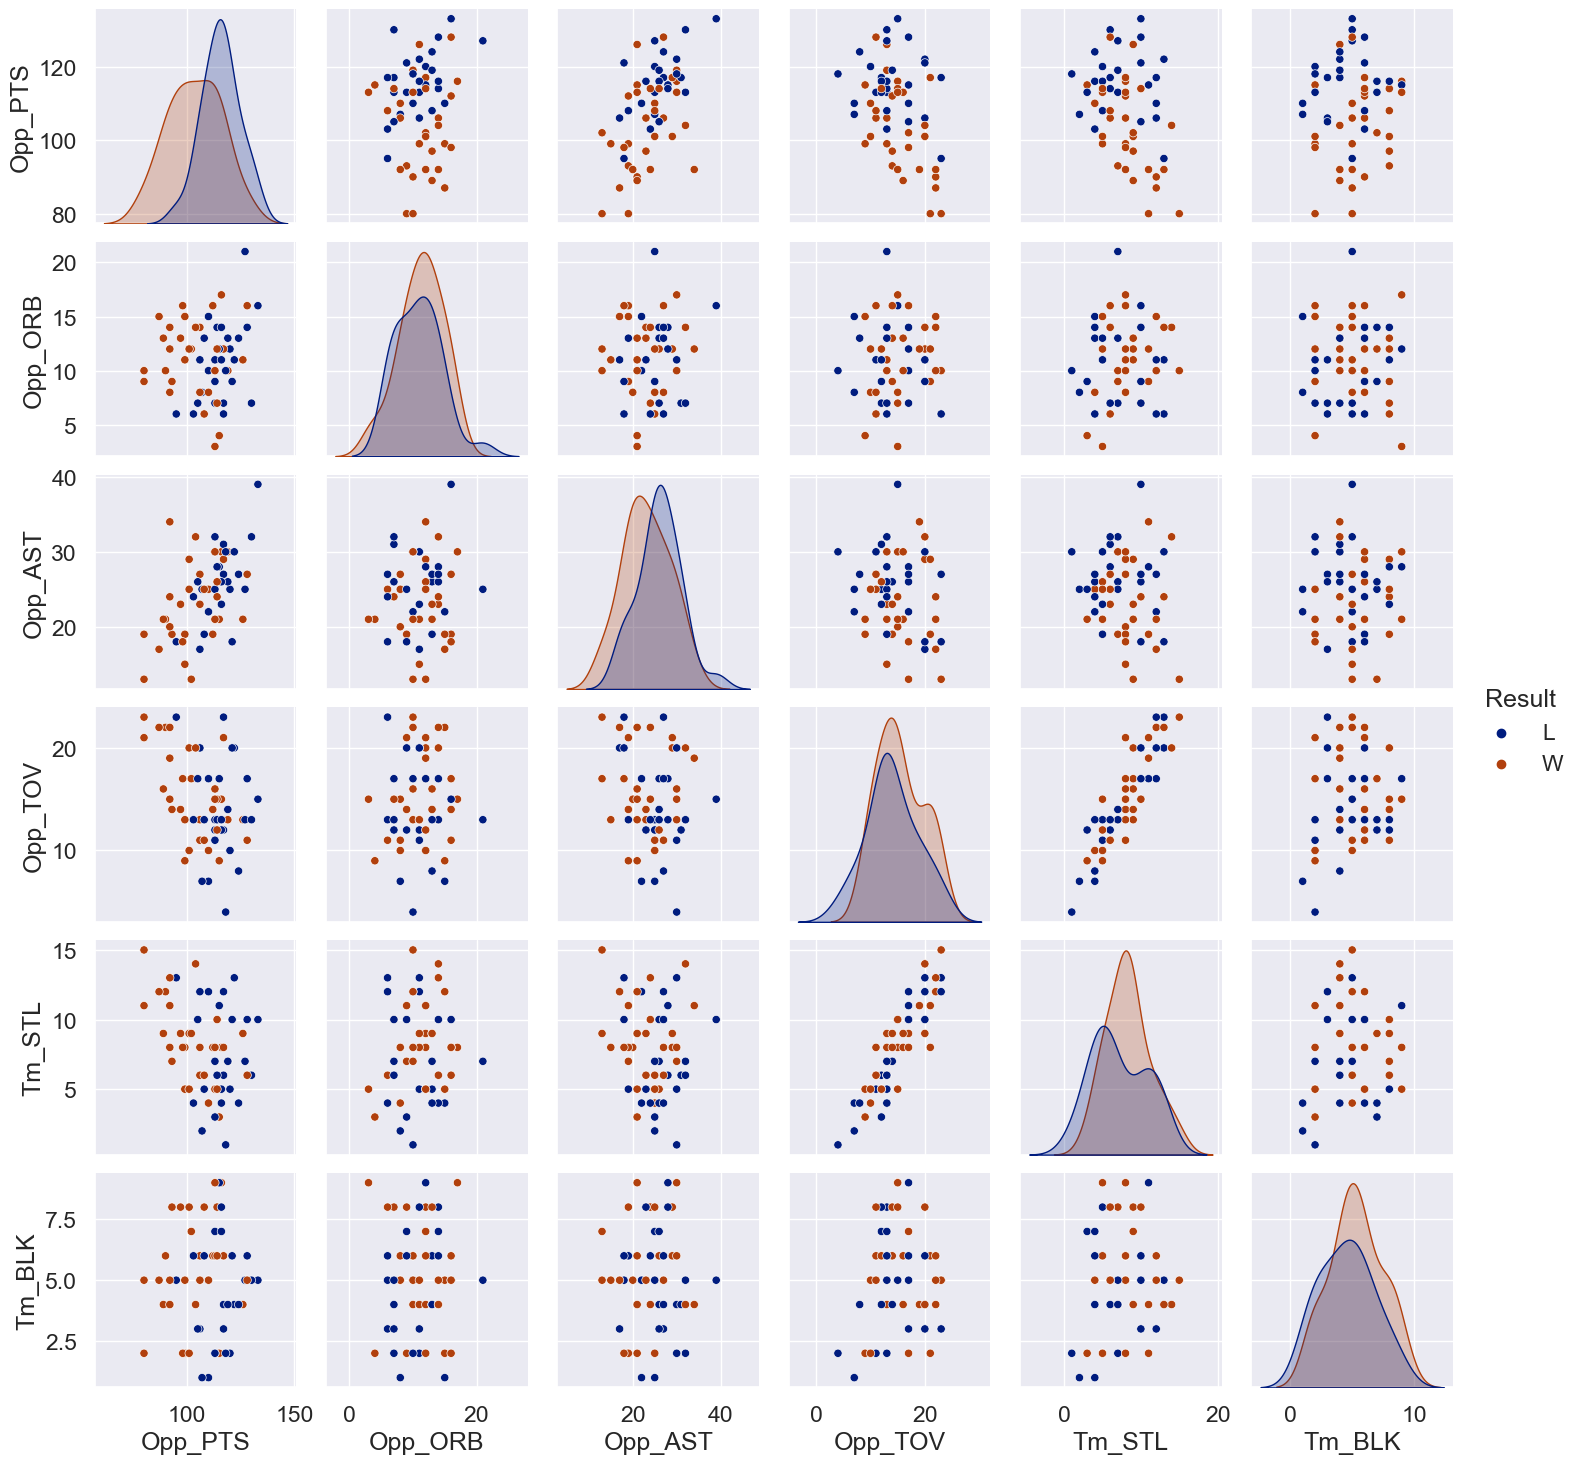

In [32]:
sns.pairplot(X_Opp_bas, hue="Result", diag_kind='kde', kind='scatter', palette='dark')
plt.show()

In [33]:
Opp_adv_sh= ['Opp_PTS', 'Result', 'Opp_ORtg', 'Opp_FTr', 'Opp_3PAr', 'Opp_TS%', 'Opp_eFG%', 'Opp_FT/FGA', 'Opp_Pace']#, 'Tm_ORB%','Tm_AST%', 'Opp_DRB',           
#         'Opp_DRtg', 'Opp_DRB%', 'Opp_STL%', 'Opp_BLK%', 'Opp_TOV%', 


In [34]:
X_Opp_adv_sh= df_team[Opp_adv_sh]


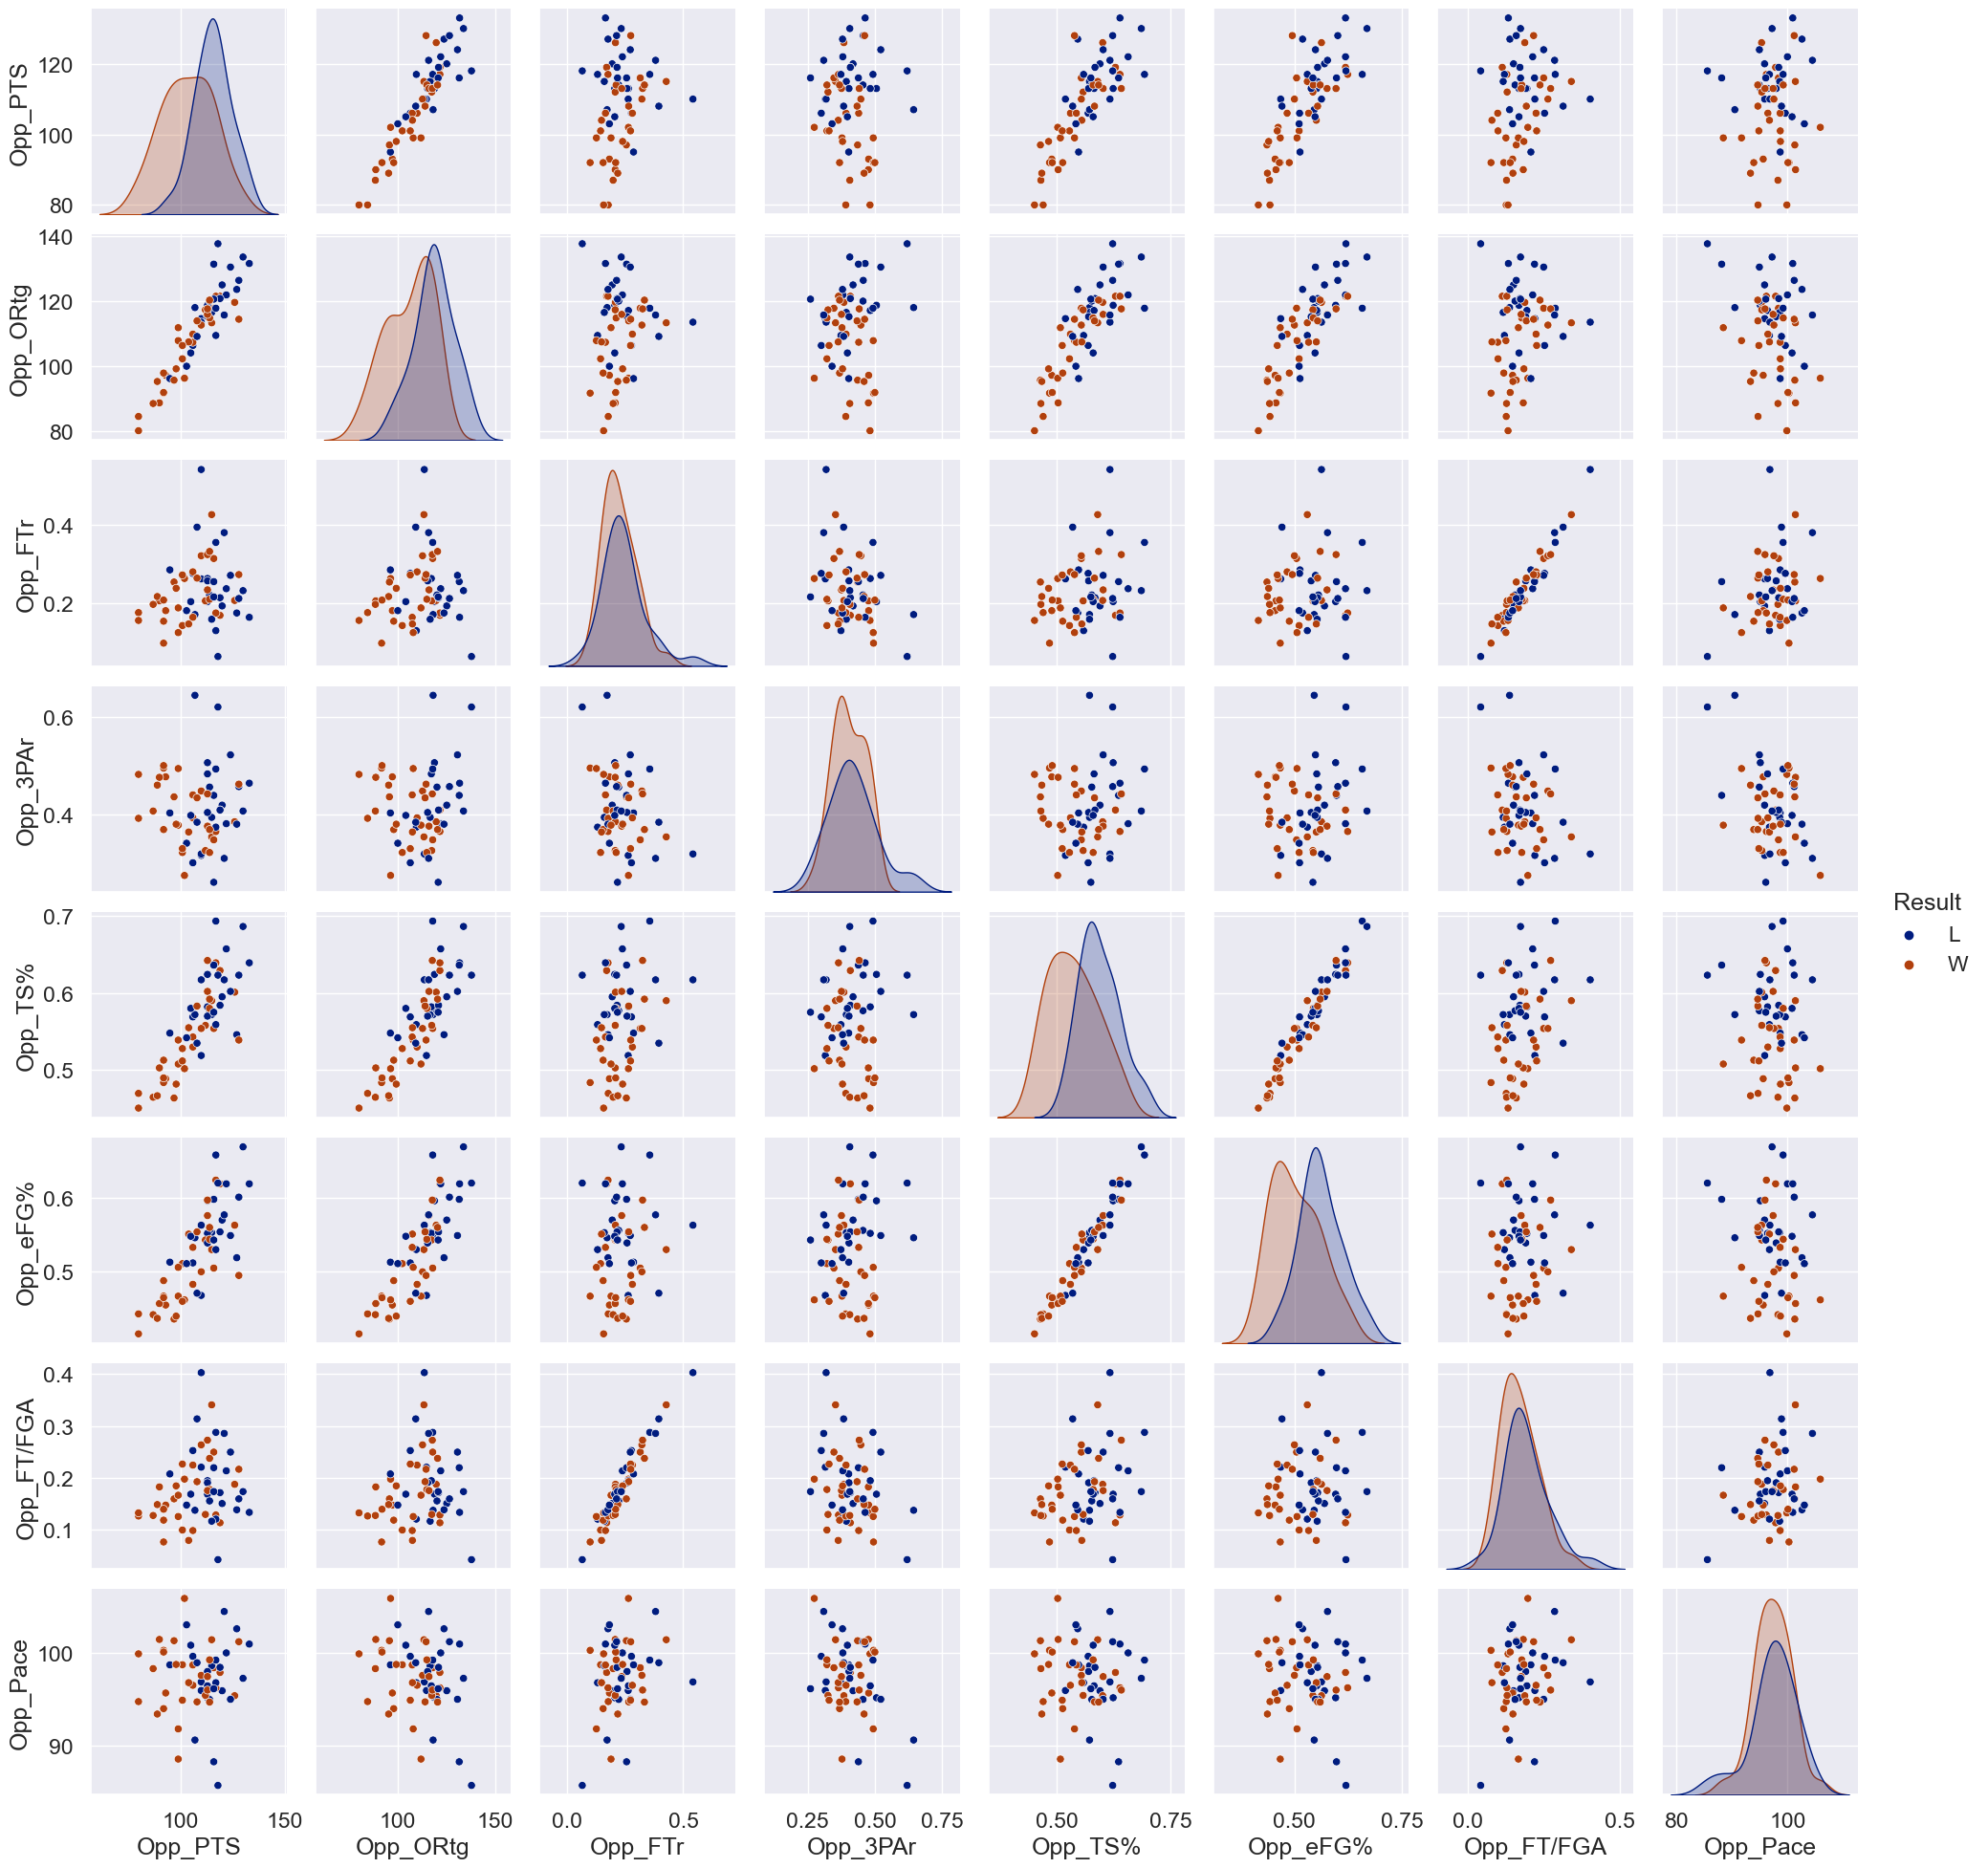

In [35]:
sns.pairplot(X_Opp_adv_sh, hue="Result", diag_kind='kde', kind='scatter', palette='dark')
plt.show()

In [36]:
Opp_adv_off= ['Opp_PTS', 'Result', 'Opp_ORB%','Opp_AST%', 'Tm_DRB', 'Tm_DRtg', 'Tm_DRB%', 'Tm_STL%', 'Tm_BLK%', 'Tm_TOV%']


In [37]:
X_Opp_adv_off= df_team[adv_off]


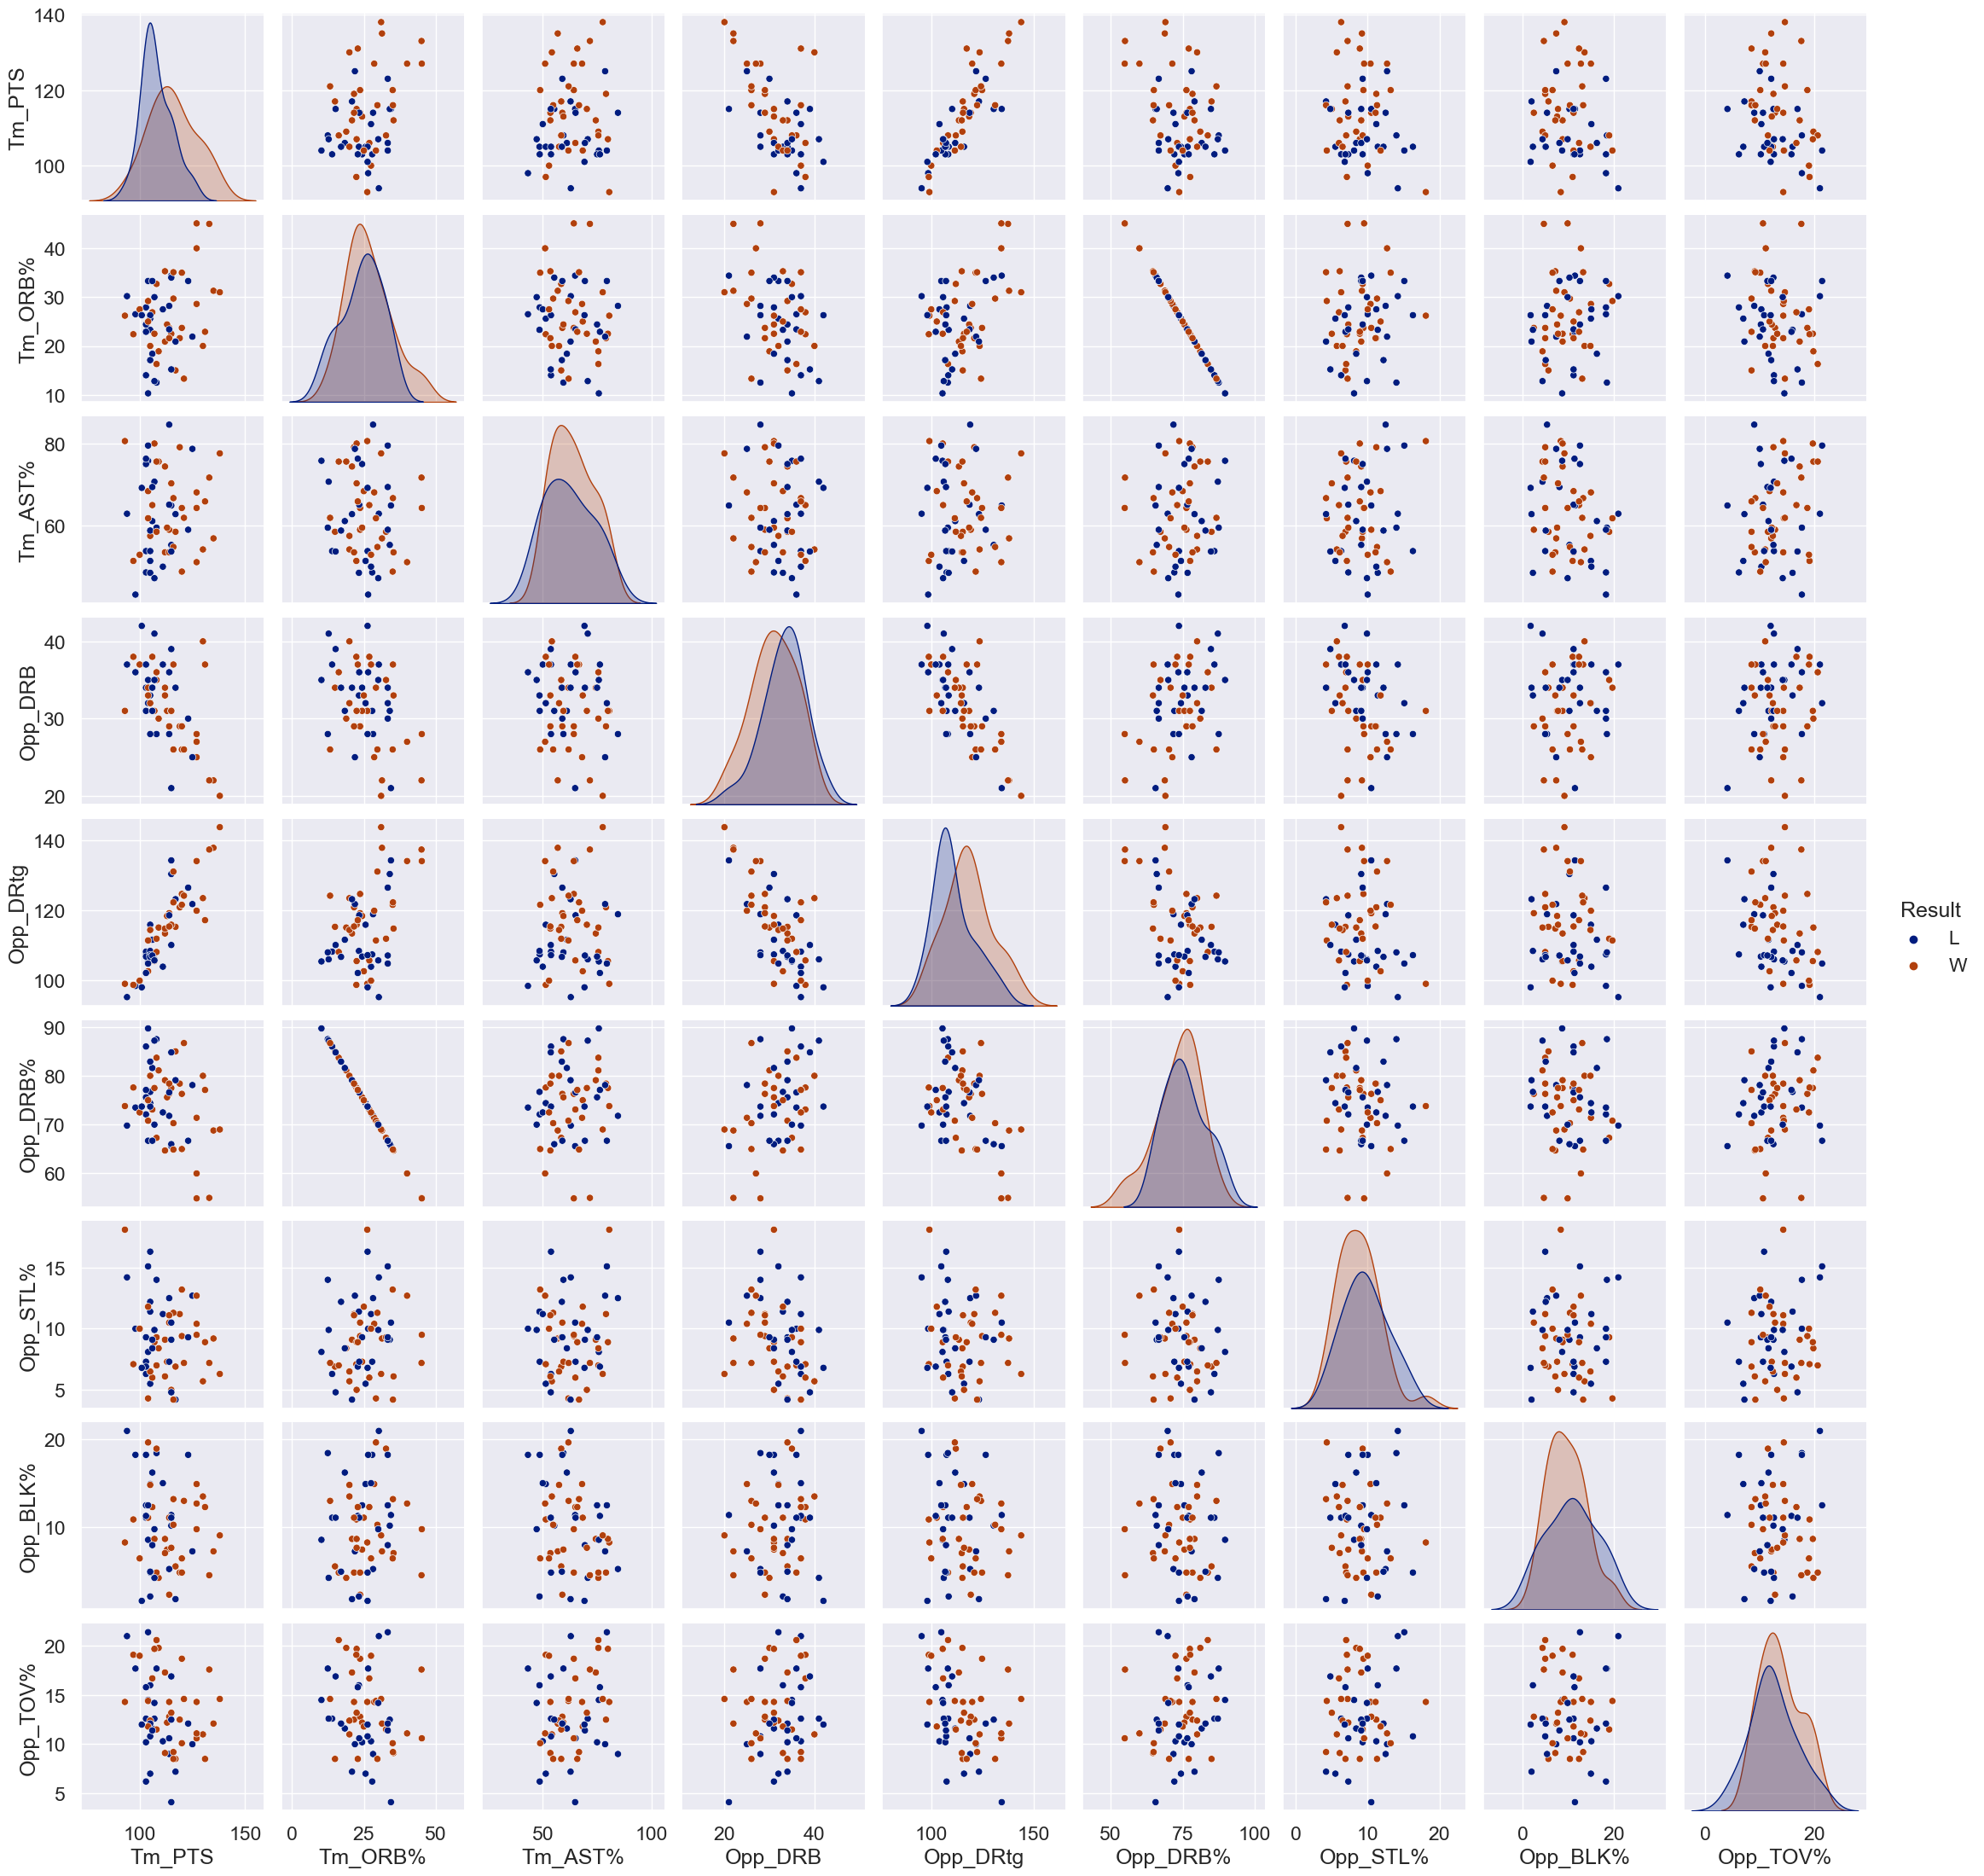

In [38]:
sns.pairplot(X_Opp_adv_off, hue="Result", diag_kind='kde', kind='scatter', palette='dark')
plt.show()